# Classification On Medical Dataset

## Importing all the necessary modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt          
import datetime as dt 
import scipy.stats as stats
import statsmodels.formula.api as smf

In [2]:
#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split

#Module related to calculation of metrics
from sklearn import metrics

## Importing the data from an external source into the Python environment

In [3]:
data = pd.read_csv('liver_cirrhosis.csv')
data.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [4]:
data.shape

(25000, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

## Data Duplicacy: Chech if their is duplicate data or not

In [6]:
data.duplicated().sum()

15361

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

0

In [9]:
data.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [10]:
data.shape

(9639, 19)

In [11]:
data['Age_in_years']=np.round(data['Age']/365.25,0)

In [12]:
data.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_in_years
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1,51.0
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2,54.0
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2,32.0
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2,45.0
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1,59.0


In [13]:
data.select_dtypes(['object']).nunique()

Status          3
Drug            2
Sex             2
Ascites         2
Hepatomegaly    2
Spiders         2
Edema           3
dtype: int64

### Missing value detection and treatment

In [14]:
data.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Age_in_years     0
dtype: int64

In [15]:
data['Stage'].value_counts()

Stage
2    3308
3    3306
1    3025
Name: count, dtype: int64

### Distribution of Liver Cirrhosis Stages

<Axes: xlabel='Stage'>

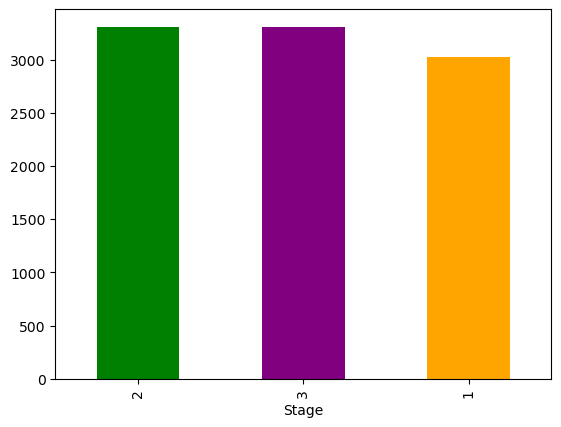

In [16]:
data['Stage'].value_counts().plot(kind='bar',color=['green','purple','orange'])

In [17]:
data['Sex'].value_counts()

Sex
F    8560
M    1079
Name: count, dtype: int64

### Distribution of Gender

<Axes: xlabel='Sex'>

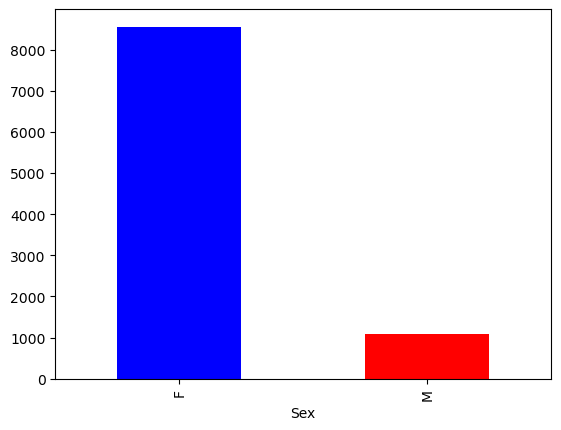

In [18]:
data['Sex'].value_counts().plot(kind='bar',color=['blue','red'])

<Axes: >

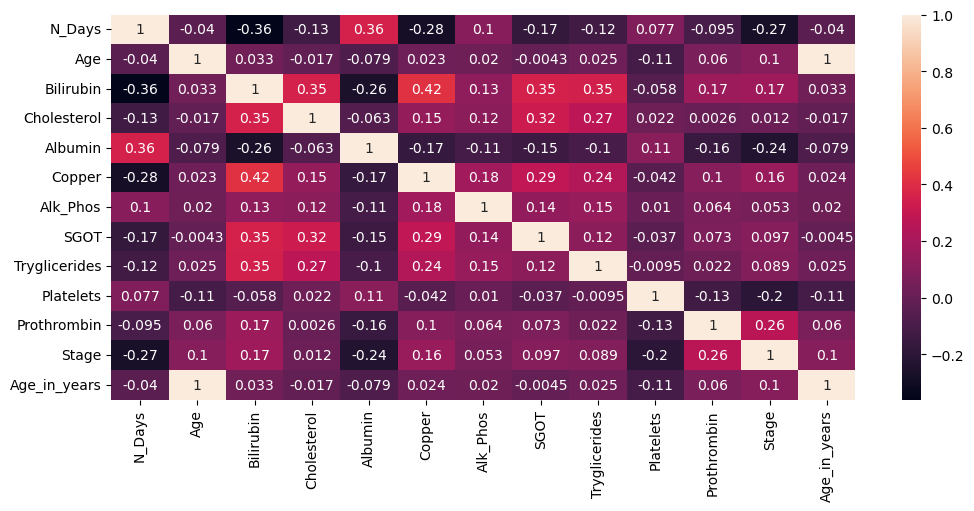

In [19]:
plt.figure(figsize=(12,5))
sns.heatmap(data.select_dtypes(['int','float']).corr(), annot = True)

### Checking the value count of categorical variables

In [20]:
data['Stage'].value_counts()

Stage
2    3308
3    3306
1    3025
Name: count, dtype: int64

In [21]:
data['Sex'].value_counts()

Sex
F    8560
M    1079
Name: count, dtype: int64

In [22]:
data['N_Days'].value_counts()

N_Days
1170    92
1434    73
3445    68
1301    60
2504    59
        ..
1430     1
2702     1
284      1
46       1
1264     1
Name: count, Length: 549, dtype: int64

In [23]:
data['Drug'].value_counts()

Drug
Placebo            6212
D-penicillamine    3427
Name: count, dtype: int64

In [24]:
data['Ascites'].value_counts()

Ascites
N    6329
Y    3310
Name: count, dtype: int64

In [25]:
data['Hepatomegaly'].value_counts()

Hepatomegaly
N    5904
Y    3735
Name: count, dtype: int64

In [26]:
data['Spiders'].value_counts()

Spiders
N    4960
Y    4679
Name: count, dtype: int64

In [27]:
data['Edema'].value_counts()

Edema
N    8055
S    1227
Y     357
Name: count, dtype: int64

## Outlier Treatment

**Just resetting the row indexes**

In [28]:
data.reset_index(inplace = True)

In [29]:
data = data.drop(columns = 'index')

In [30]:
data['row_num'] = pd.Series(range(1,9640,1))

In [31]:
data

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_in_years,row_num
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,...,4.04,227.000000,598.000000,52.700000,57.000000,256.0,9.9,1,51.0,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,...,3.93,22.000000,663.000000,45.000000,75.000000,220.0,10.8,2,54.0,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,...,3.54,51.000000,1243.000000,122.450000,80.000000,225.0,10.0,2,32.0,3
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,...,3.74,23.000000,1024.000000,77.500000,58.000000,151.0,10.2,2,45.0,4
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,...,3.54,74.000000,1052.000000,108.500000,109.000000,151.0,11.5,1,59.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9634,3577,C,Placebo,17897,F,Y,N,Y,N,0.7,...,3.49,97.648387,1982.655769,122.556346,124.702128,243.0,9.7,1,49.0,9635
9635,4795,C,Placebo,23376,F,Y,N,Y,N,1.8,...,3.24,97.648387,1982.655769,122.556346,124.702128,139.0,10.5,1,64.0,9636
9636,3358,D,D-penicillamine,24585,F,N,Y,N,N,2.1,...,3.48,58.000000,2045.000000,89.900000,84.000000,412.0,11.8,3,67.0,9637
9637,4365,C,D-penicillamine,21324,F,N,N,N,N,0.9,...,3.40,81.000000,1098.000000,122.450000,90.000000,228.0,10.3,2,58.0,9638


### Splitting the data into categorical columns and numerical columns:

In [32]:
cat = [var for var in data.columns if data[var].dtype == 'O']
num = [var for var in data.columns if data[var].dtype != 'O']

In [33]:
num_data = data[num]

In [34]:
cat_data = data[cat]

In [35]:
num_data.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_in_years,row_num
0,2221,18499,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1,51.0,1
1,1230,19724,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2,54.0,2
2,4184,11839,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2,32.0,3
3,2090,16467,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2,45.0,4
4,2105,21699,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1,59.0,5


In [36]:
num_data.shape

(9639, 14)

In [37]:
cat_data.head(3)

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
0,C,Placebo,F,N,Y,N,N
1,C,Placebo,M,Y,N,Y,N
2,C,Placebo,F,N,N,N,N


In [38]:
cat_data.shape

(9639, 7)

In [39]:
cat_data['row'] = data['row_num']

C:\Users\Siddhant\AppData\Local\Temp\ipykernel_2872\615142602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['row'] = data['row_num']


In [212]:
cat_data.head(4)

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,row
0,C,Placebo,F,N,Y,N,N,1
1,C,Placebo,M,Y,N,Y,N,2
2,C,Placebo,F,N,N,N,N,3
3,D,Placebo,F,N,N,N,N,4


# Outlier Detection and Treatment on the numerical data

In [213]:
num_data.columns

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Age_in_years', 'row_num'],
      dtype='object')

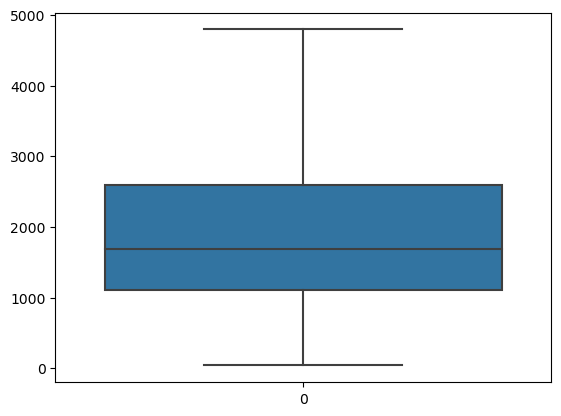

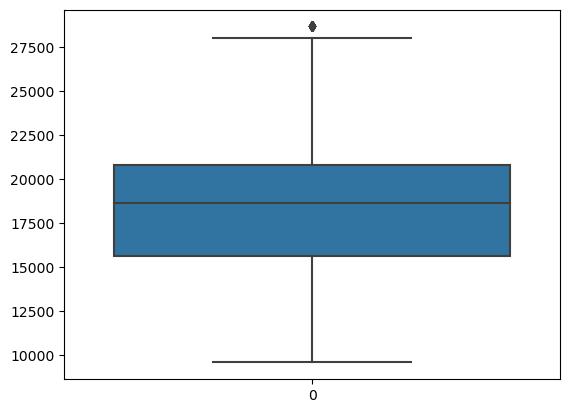

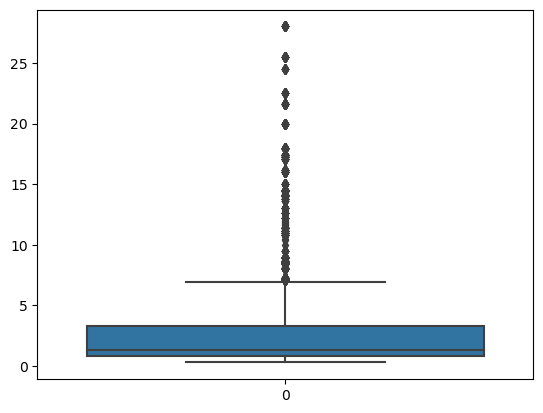

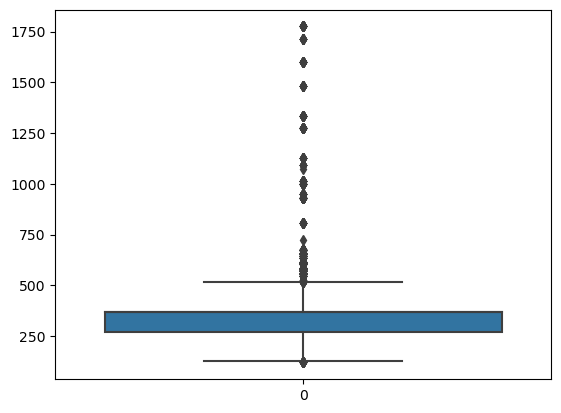

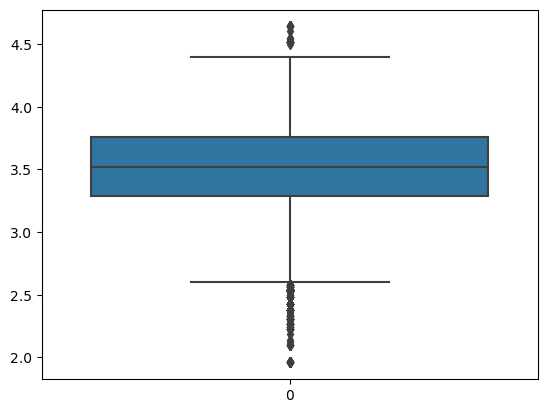

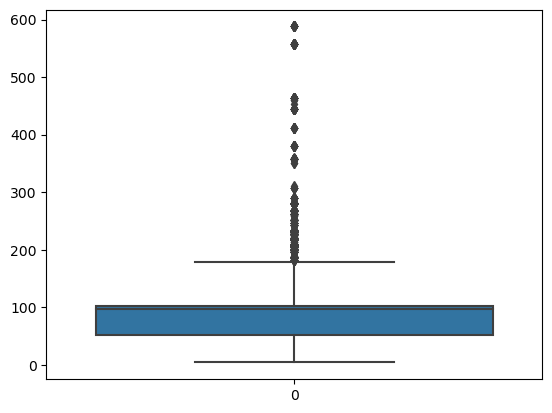

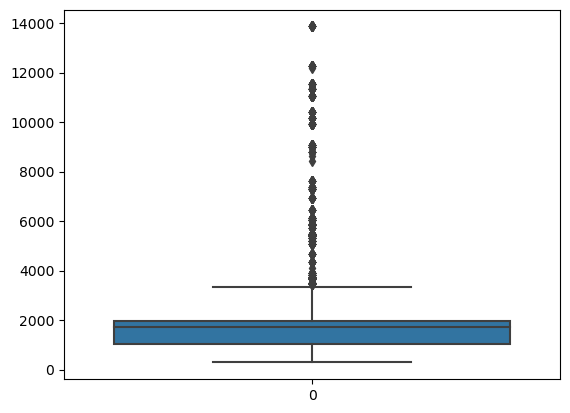

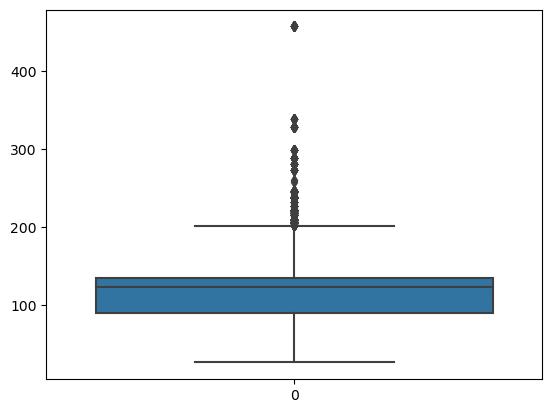

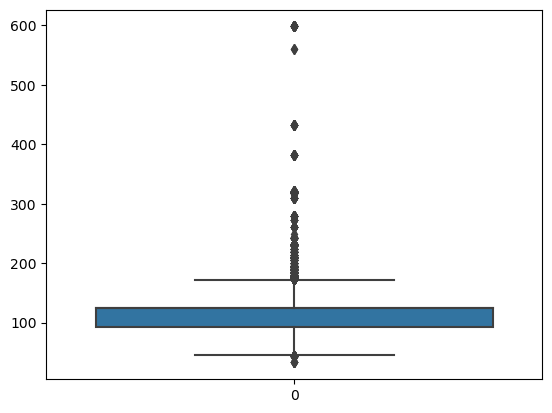

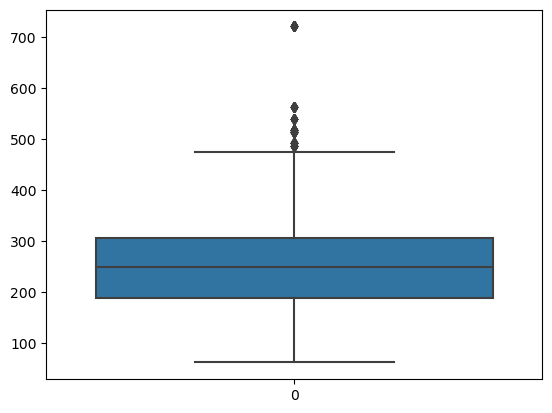

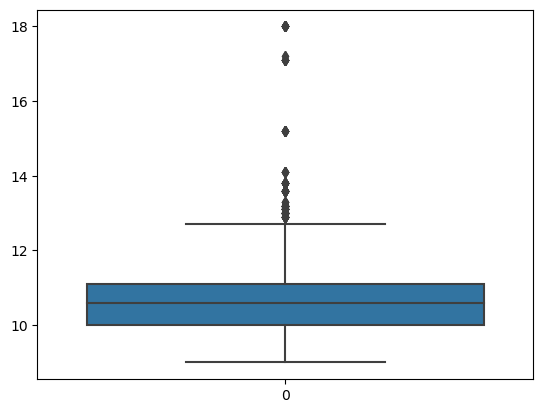

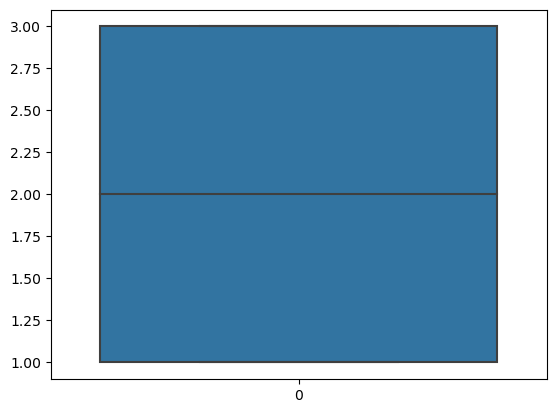

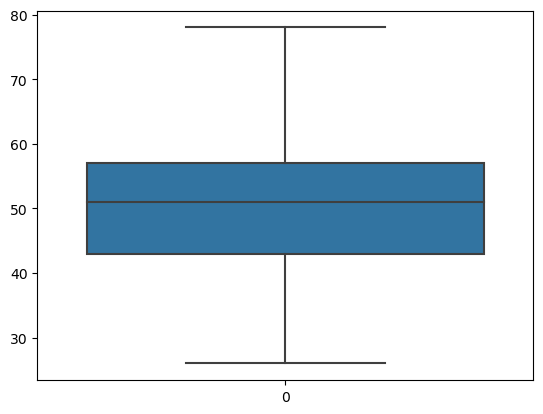

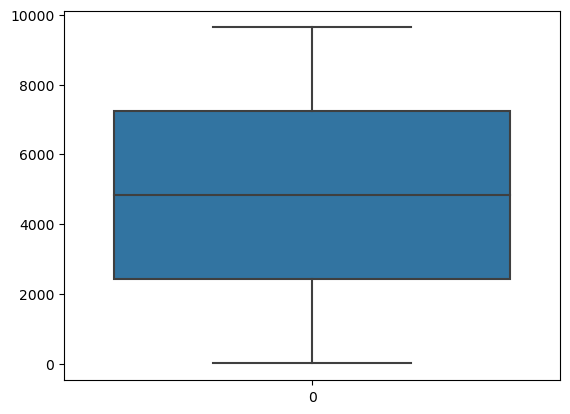

In [214]:
for col in num_data:
    sns.boxplot(num_data[col])
    plt.show()

**We will make two copies of the numerical data:**
    
**num_data_A: We will not do any outlier treatment on some specific variables.**
    
**num_data_B: We will do outlier treatment on all the variables.**

In [215]:
num_data_A = num_data.copy()
num_data_B = num_data.copy()

In [216]:
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

In [217]:
num_data_B.apply(outliertreat_IQR)

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_in_years,row_num
0,-1139.5,7841.5,-2.95,123.234155,2.585,-25.5,-396.483653,22.475,45.0,9.5,8.35,-2.0,22.0,-4818.0
1,4840.5,28605.5,7.05,517.276409,4.465,178.5,3410.139422,202.275,173.0,485.5,12.75,6.0,78.0,14458.0


In [218]:
num_data_B['Age'] = num_data_B['Age'].clip(lower = 7841.5, upper = 28605.5)
num_data_B['Bilirubin'] = num_data_B['Bilirubin'].clip(lower = -2.95, upper = 7.05)
num_data_B['Cholesterol'] = num_data_B['Cholesterol'].clip(lower = 123.234155, upper = 517.276409)
num_data_B['Albumin'] = num_data_B['Albumin'].clip(lower = 2.585, upper = 4.465)
num_data_B['Copper'] = num_data_B['Copper'].clip(lower = -25.5, upper = 178.5)
num_data_B['Alk_Phos'] = num_data_B['Alk_Phos'].clip(lower = -396.483653, upper = 3410.139422)
num_data_B['SGOT'] = num_data_B['SGOT'].clip(lower = 722.475, upper = 202.275)
num_data_B['Tryglicerides'] = num_data_B['Tryglicerides'].clip(lower = 45.0, upper = 173.0)
num_data_B['Platelets'] = num_data_B['Platelets'].clip(lower = 9.5, upper = 485.5)
num_data_B['Prothrombin'] = num_data_B['Prothrombin'].clip(lower = 8.35, upper = 12.75)

In [219]:
num_data_B.columns

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Age_in_years', 'row_num'],
      dtype='object')

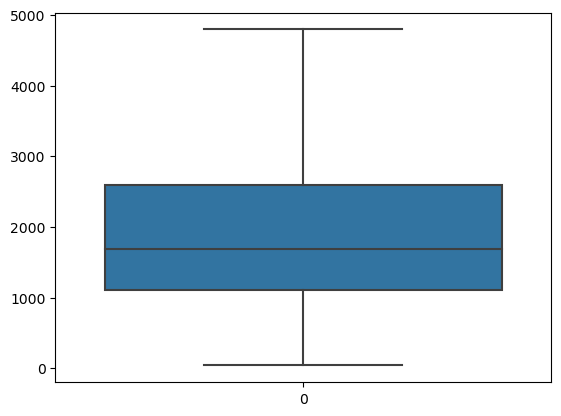

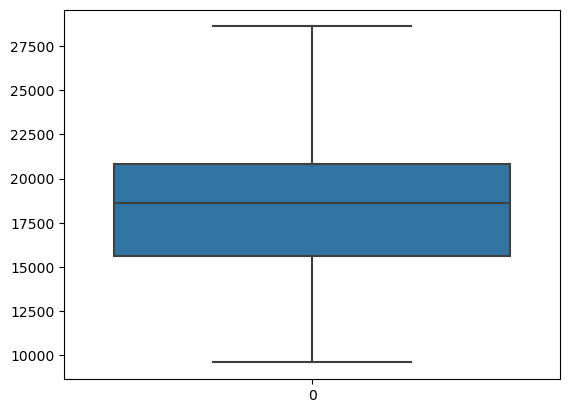

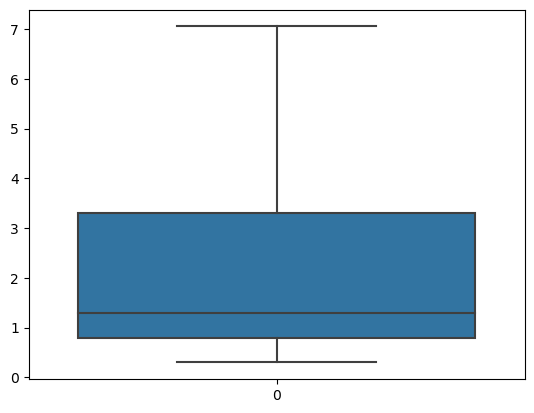

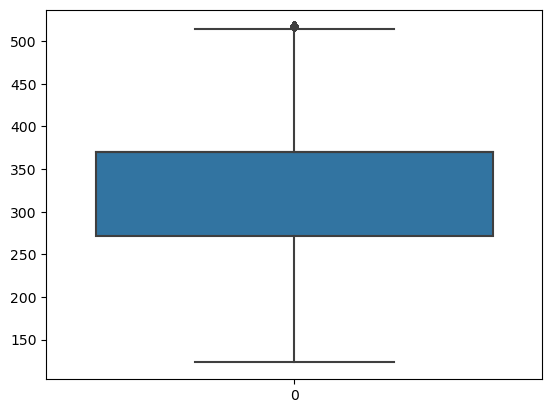

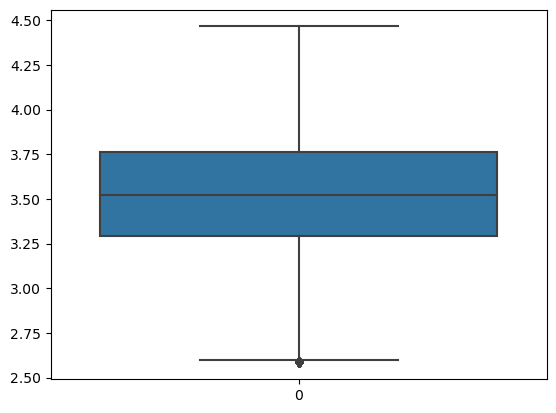

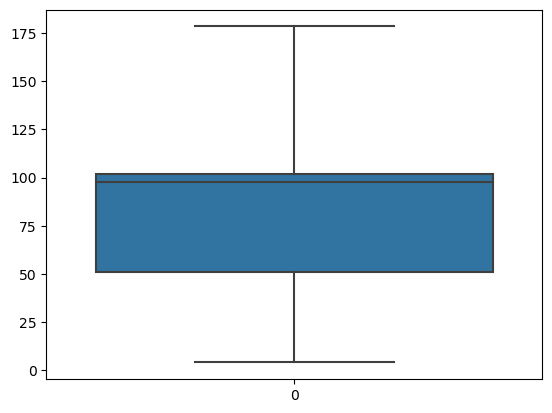

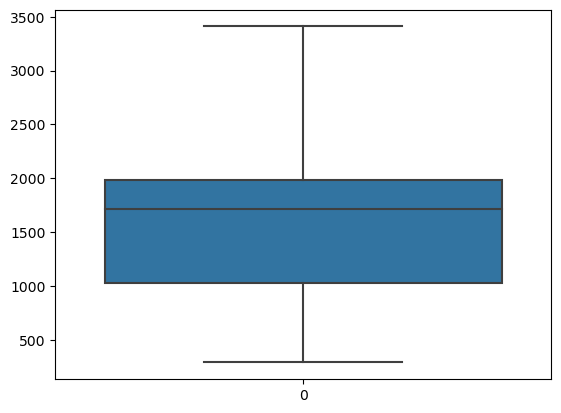

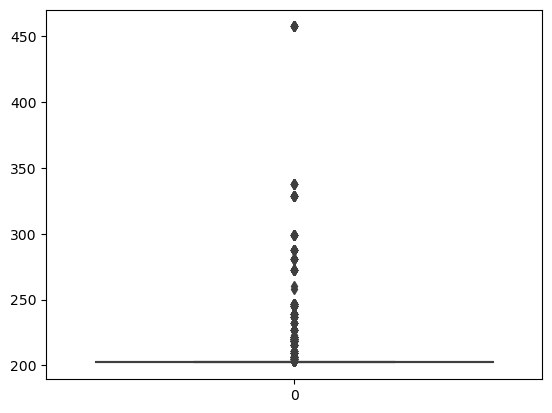

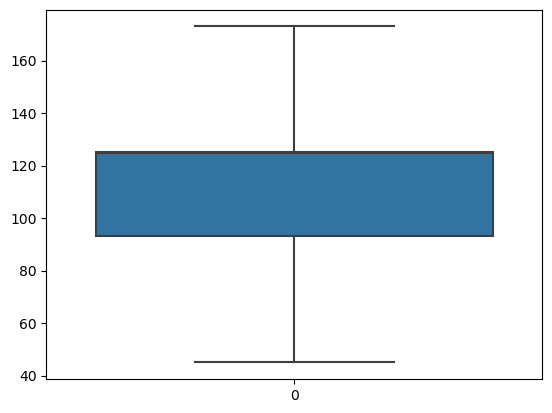

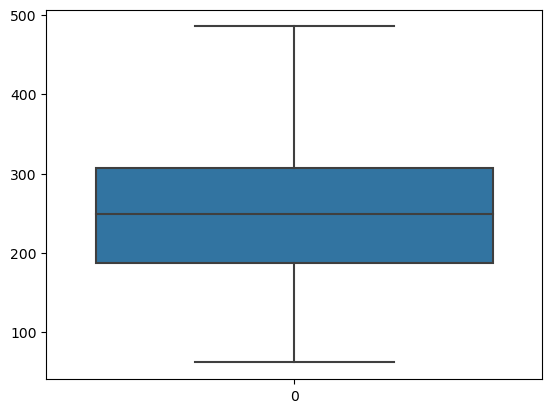

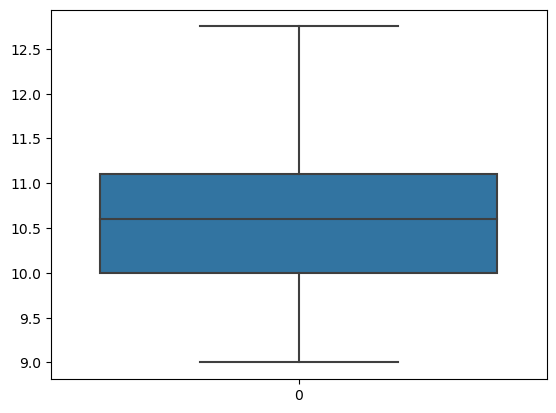

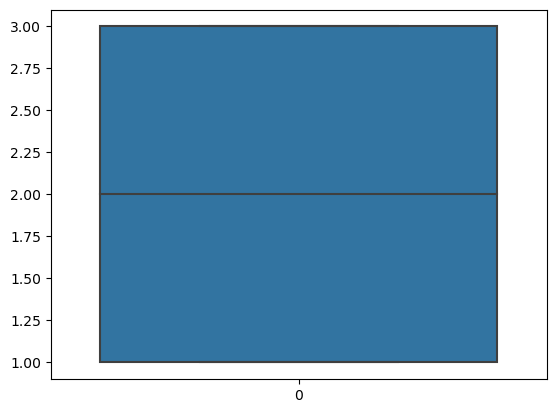

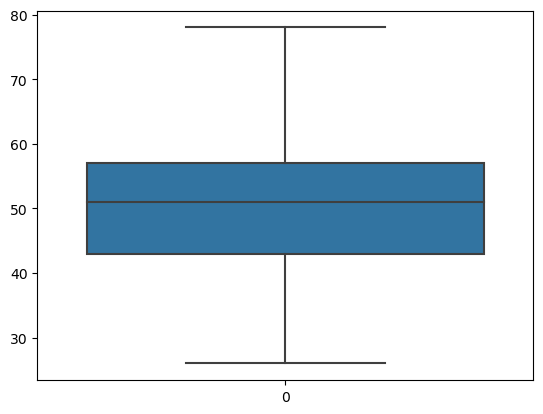

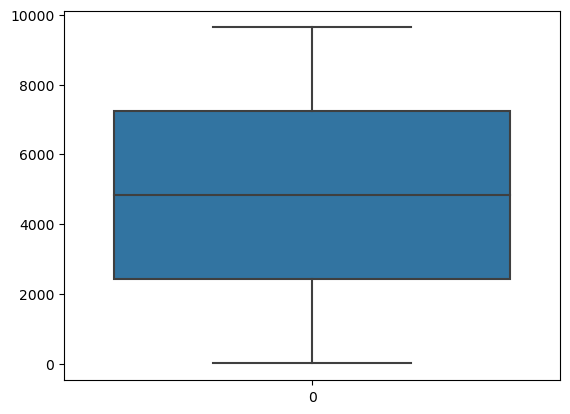

In [220]:
for col in num_data_B:
    sns.boxplot(num_data_B[col])
    plt.show()

In [221]:
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

In [222]:
num_data_A.apply(outliertreat_IQR)

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_in_years,row_num
0,-1139.5,7841.5,-2.95,123.234155,2.585,-25.5,-396.483653,22.475,45.0,9.5,8.35,-2.0,22.0,-4818.0
1,4840.5,28605.5,7.05,517.276409,4.465,178.5,3410.139422,202.275,173.0,485.5,12.75,6.0,78.0,14458.0


In [223]:
num_data_A['Age'] = num_data_A['Age'].clip(lower = 7841.5, upper = 28605.5)
num_data_A['Cholesterol'] = num_data_A['Cholesterol'].clip(lower = 123.234155, upper = 517.276409)
num_data_A['Albumin'] = num_data_A['Albumin'].clip(lower = 2.585, upper = 4.465)
num_data_A['SGOT'] = num_data_A['SGOT'].clip(lower = 722.475, upper = 202.275)
num_data_A['Tryglicerides'] = num_data_A['Tryglicerides'].clip(lower = 45.0, upper = 173.0)
num_data_A['Platelets'] = num_data_A['Platelets'].clip(lower = 9.5, upper = 485.5)
num_data_A['Prothrombin'] = num_data_A['Prothrombin'].clip(lower = 8.35, upper = 12.75)

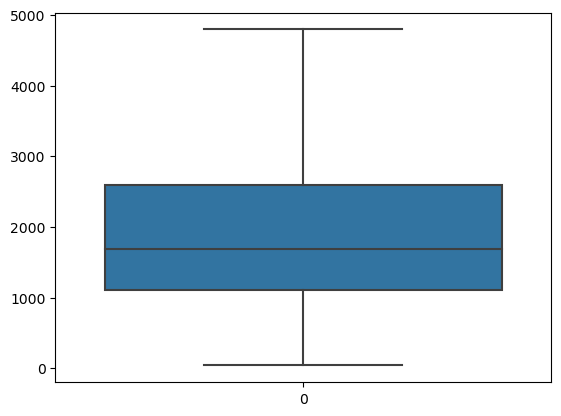

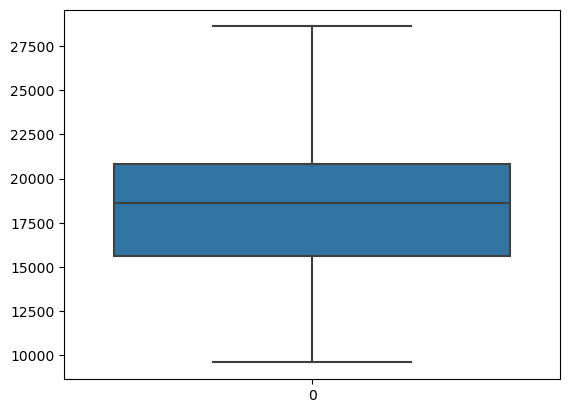

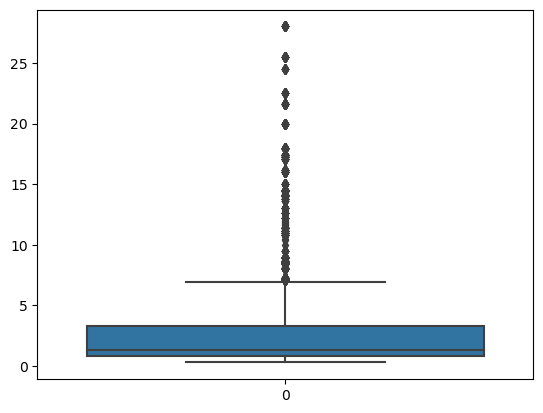

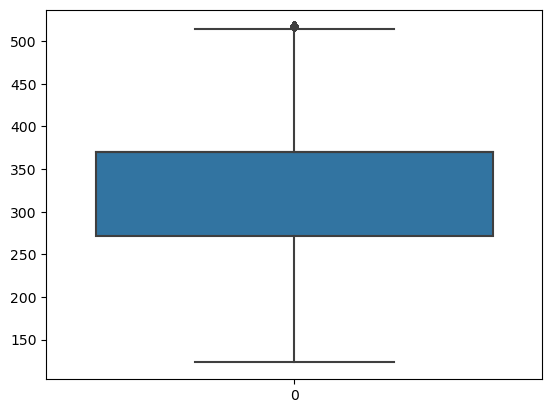

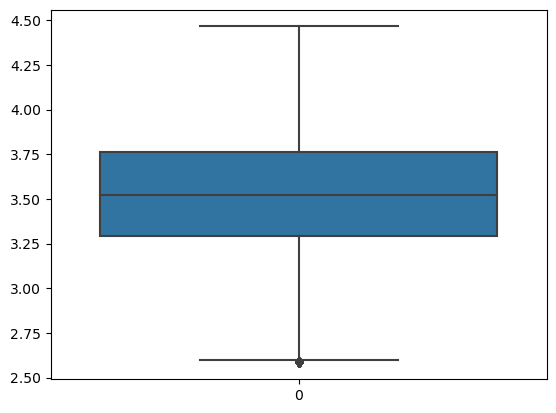

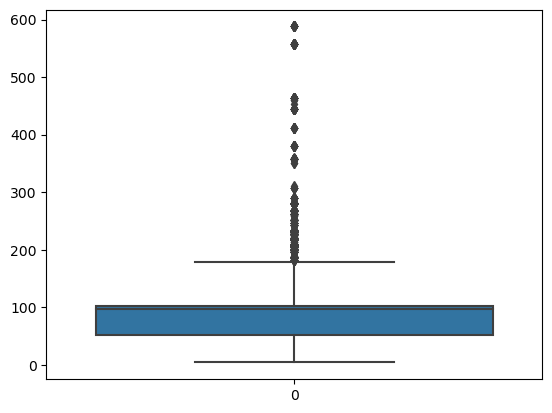

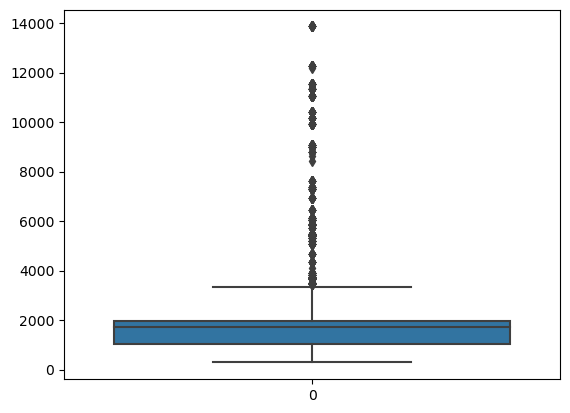

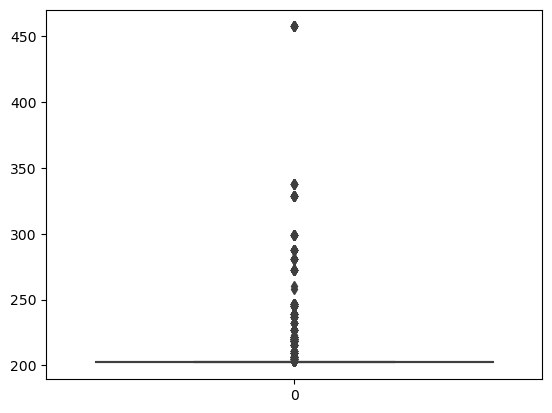

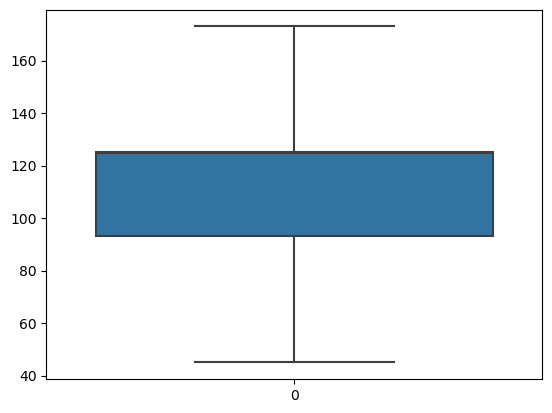

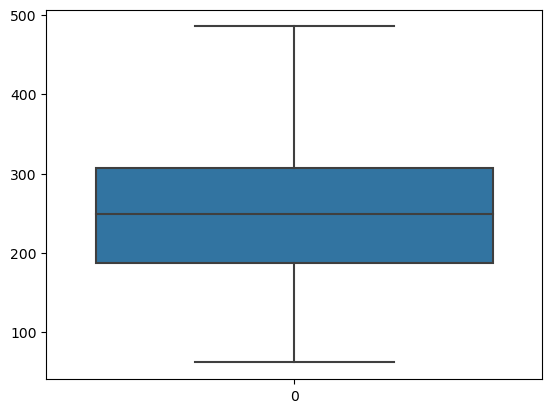

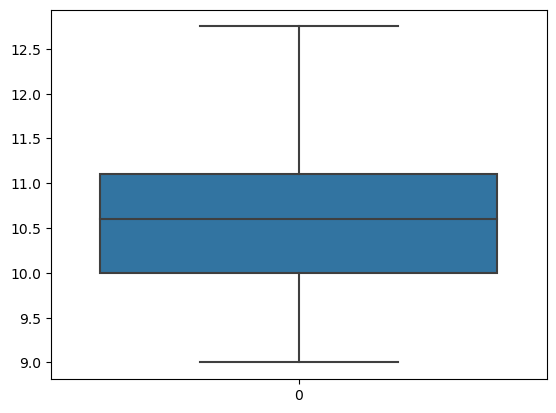

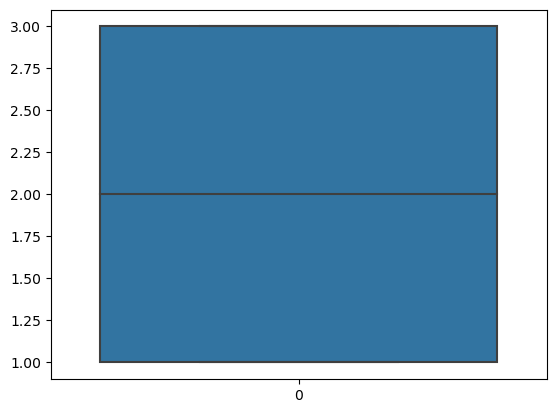

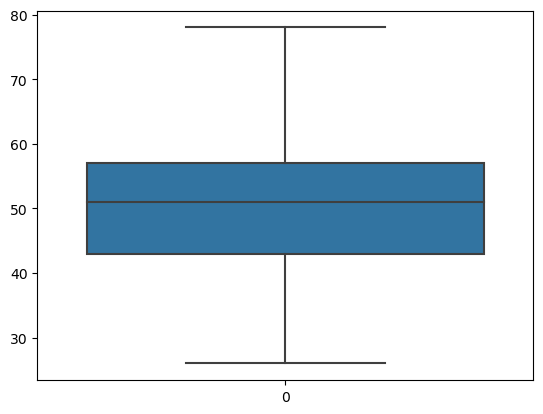

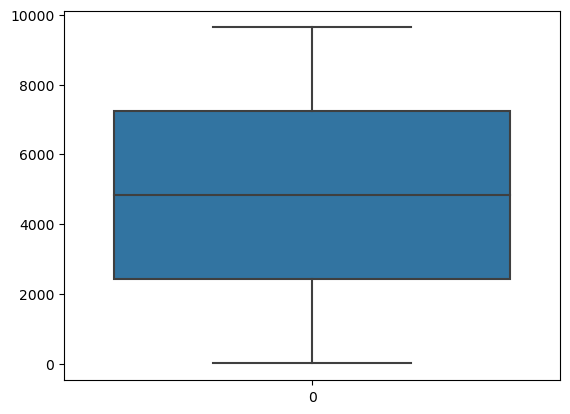

In [224]:
for col in num_data_A:
    sns.boxplot(num_data_A[col])
    plt.show()

# Merging the numerical data and the categorical data:

In [225]:
cat_data.shape

(9639, 8)

In [226]:
cat_data.head(3)

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,row
0,C,Placebo,F,N,Y,N,N,1
1,C,Placebo,M,Y,N,Y,N,2
2,C,Placebo,F,N,N,N,N,3


In [227]:
num_data.shape

(9639, 14)

In [228]:
num_data.head(3)

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_in_years,row_num
0,2221,18499,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1,51.0,1
1,1230,19724,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2,54.0,2
2,4184,11839,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2,32.0,3


**Merging num_data_B and cat_data**

In [229]:
final_data_B = pd.merge(num_data_B,cat_data,how = 'inner', left_on = 'row_num', right_on = 'row')

In [230]:
final_data_B.head(5)

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Age_in_years,row_num,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,row
0,2221,18499.0,0.5,149.0,4.04,178.5,598.0,202.275,57.0,256.0,...,51.0,1,C,Placebo,F,N,Y,N,N,1
1,1230,19724.0,0.5,219.0,3.93,22.0,663.0,202.275,75.0,220.0,...,54.0,2,C,Placebo,M,Y,N,Y,N,2
2,4184,11839.0,0.5,320.0,3.54,51.0,1243.0,202.275,80.0,225.0,...,32.0,3,C,Placebo,F,N,N,N,N,3
3,2090,16467.0,0.7,255.0,3.74,23.0,1024.0,202.275,58.0,151.0,...,45.0,4,D,Placebo,F,N,N,N,N,4
4,2105,21699.0,1.9,486.0,3.54,74.0,1052.0,202.275,109.0,151.0,...,59.0,5,D,Placebo,F,N,Y,N,N,5


In [231]:
cat_data.shape

(9639, 8)

In [232]:
cat_data.head(3)

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,row
0,C,Placebo,F,N,Y,N,N,1
1,C,Placebo,M,Y,N,Y,N,2
2,C,Placebo,F,N,N,N,N,3


In [233]:
num_data_A.shape

(9639, 14)

**Merging num_data_A and cat_data**

In [234]:
final_data_A = pd.merge(num_data_A,cat_data,how = 'inner', left_on = 'row_num', right_on = 'row')

In [235]:
final_data_A.head(5)

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Age_in_years,row_num,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,row
0,2221,18499.0,0.5,149.0,4.04,227.0,598.0,202.275,57.0,256.0,...,51.0,1,C,Placebo,F,N,Y,N,N,1
1,1230,19724.0,0.5,219.0,3.93,22.0,663.0,202.275,75.0,220.0,...,54.0,2,C,Placebo,M,Y,N,Y,N,2
2,4184,11839.0,0.5,320.0,3.54,51.0,1243.0,202.275,80.0,225.0,...,32.0,3,C,Placebo,F,N,N,N,N,3
3,2090,16467.0,0.7,255.0,3.74,23.0,1024.0,202.275,58.0,151.0,...,45.0,4,D,Placebo,F,N,N,N,N,4
4,2105,21699.0,1.9,486.0,3.54,74.0,1052.0,202.275,109.0,151.0,...,59.0,5,D,Placebo,F,N,Y,N,N,5


In [236]:
final_data_A.shape

(9639, 22)

### ONE-HOT ENCODING:

In [237]:
cat_data.nunique()

Status             3
Drug               2
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
row             9639
dtype: int64

In [238]:
cat_data.columns

Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema',
       'row'],
      dtype='object')

In [239]:
final_data_B = pd.get_dummies(final_data_B,columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'],dtype = int)

In [240]:
final_data_B.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,2221,18499.0,0.5,149.0,4.04,178.5,598.0,202.275,57.0,256.0,...,0,1,0,0,1,1,0,1,0,0
1,1230,19724.0,0.5,219.0,3.93,22.0,663.0,202.275,75.0,220.0,...,1,0,1,1,0,0,1,1,0,0
2,4184,11839.0,0.5,320.0,3.54,51.0,1243.0,202.275,80.0,225.0,...,0,1,0,1,0,1,0,1,0,0
3,2090,16467.0,0.7,255.0,3.74,23.0,1024.0,202.275,58.0,151.0,...,0,1,0,1,0,1,0,1,0,0
4,2105,21699.0,1.9,486.0,3.54,74.0,1052.0,202.275,109.0,151.0,...,0,1,0,0,1,1,0,1,0,0


In [241]:
final_data_B.shape

(9639, 31)

In [242]:
final_data_A = pd.get_dummies(final_data_A,columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'],dtype = int)

In [243]:
final_data_A.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,2221,18499.0,0.5,149.0,4.04,227.0,598.0,202.275,57.0,256.0,...,0,1,0,0,1,1,0,1,0,0
1,1230,19724.0,0.5,219.0,3.93,22.0,663.0,202.275,75.0,220.0,...,1,0,1,1,0,0,1,1,0,0
2,4184,11839.0,0.5,320.0,3.54,51.0,1243.0,202.275,80.0,225.0,...,0,1,0,1,0,1,0,1,0,0
3,2090,16467.0,0.7,255.0,3.74,23.0,1024.0,202.275,58.0,151.0,...,0,1,0,1,0,1,0,1,0,0
4,2105,21699.0,1.9,486.0,3.54,74.0,1052.0,202.275,109.0,151.0,...,0,1,0,0,1,1,0,1,0,0


In [244]:
final_data_A.shape

(9639, 31)

## Checking if the data is normally distributed or not

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Program

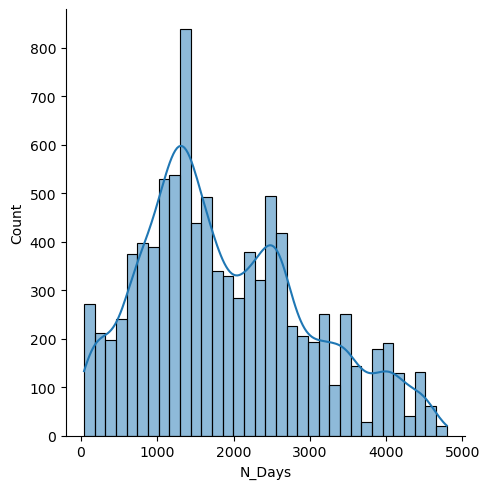

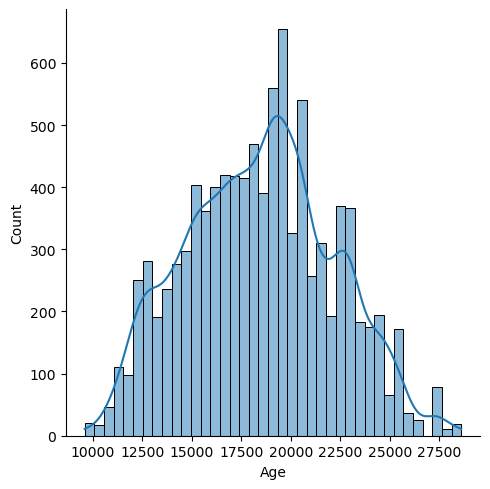

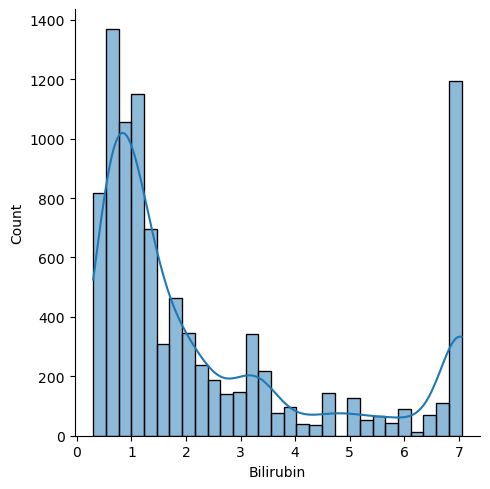

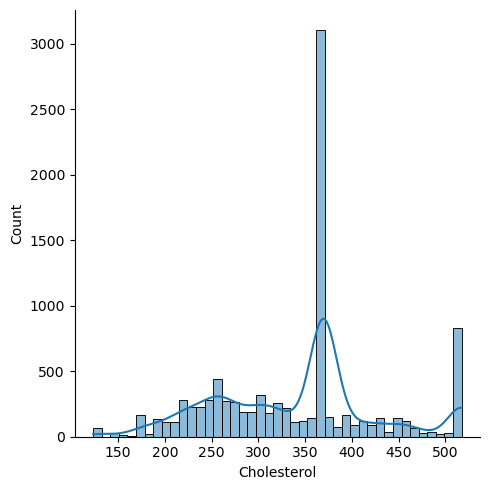

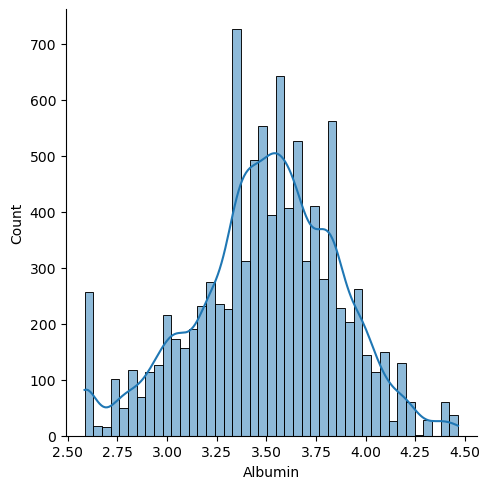

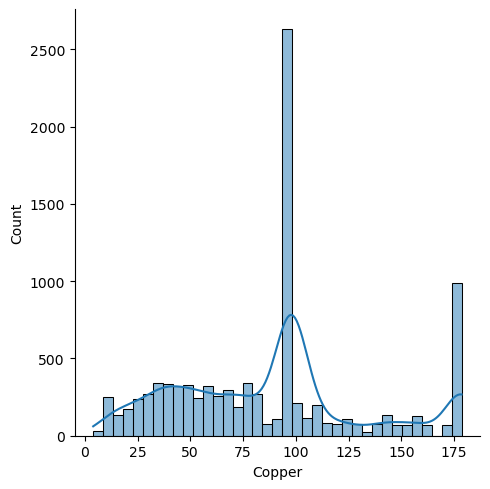

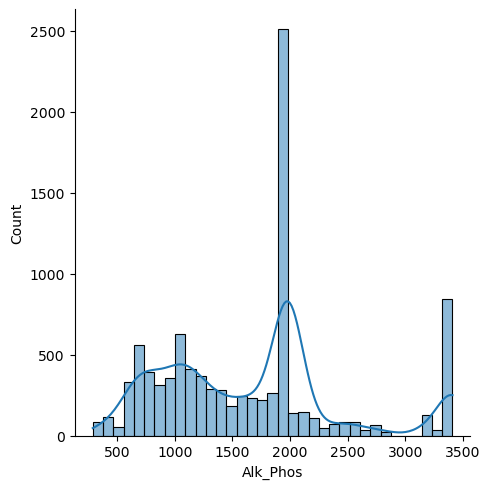

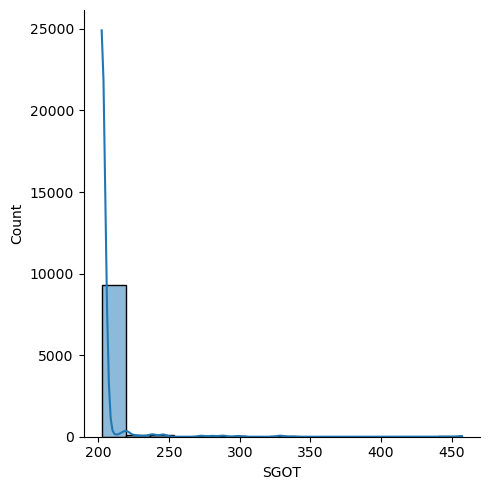

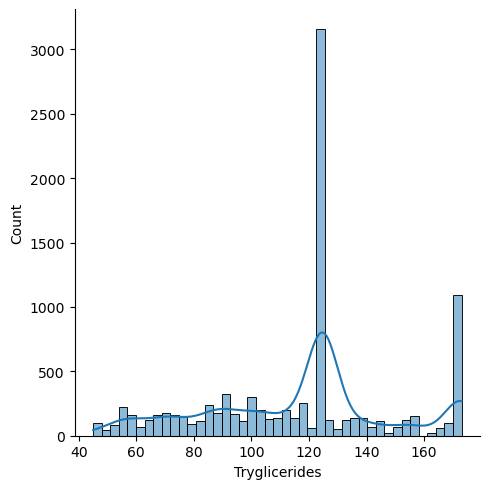

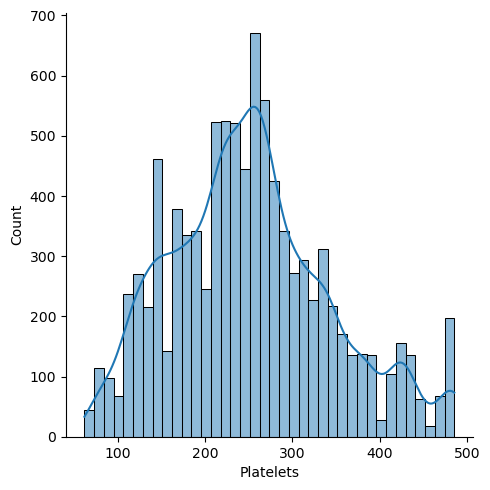

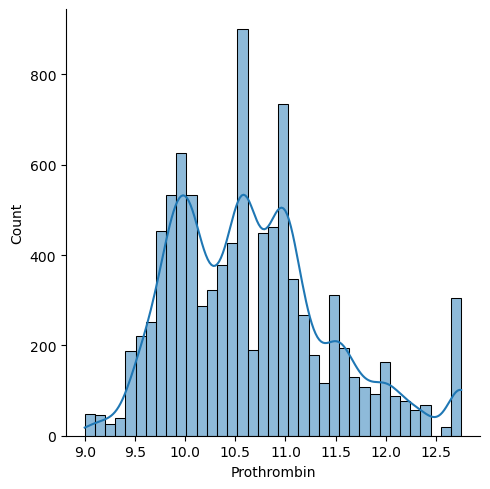

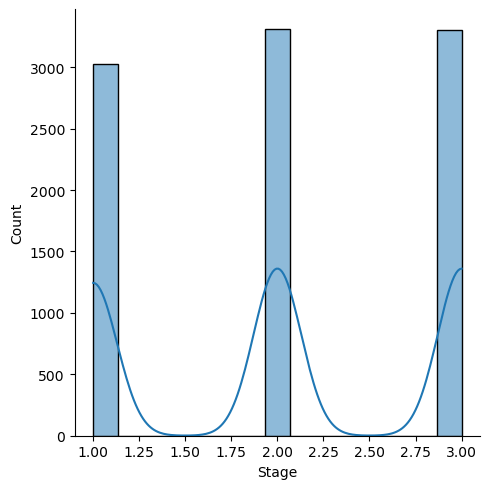

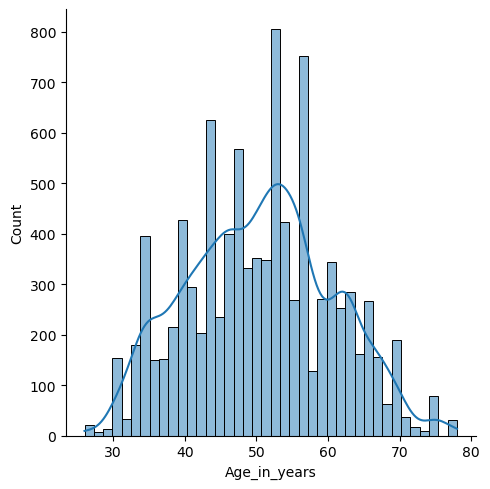

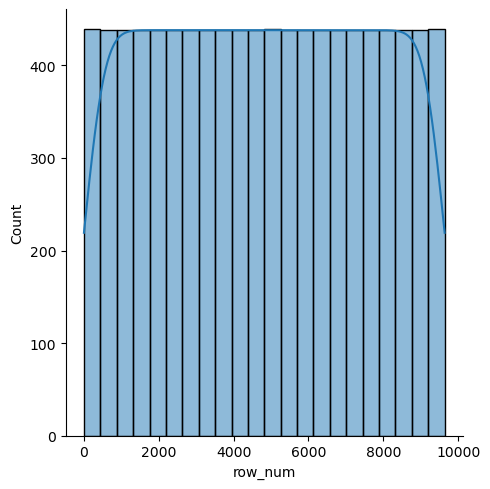

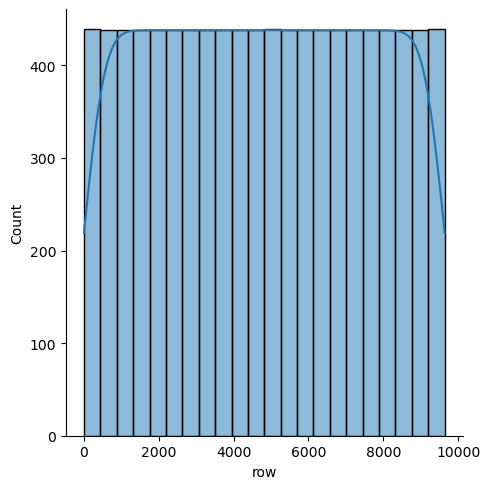

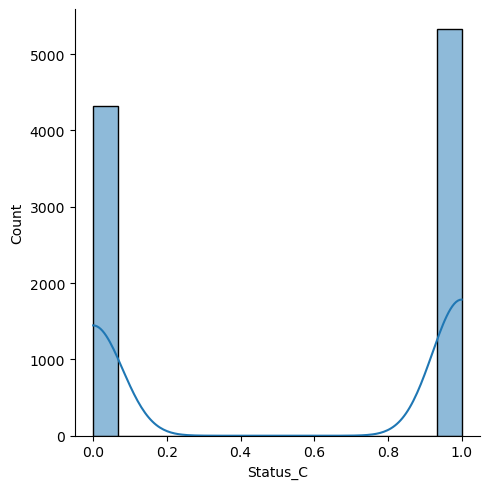

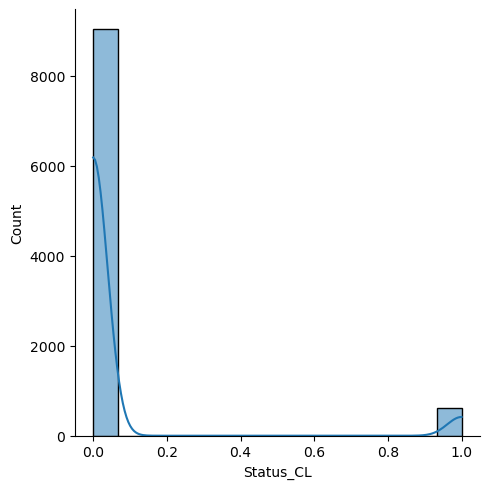

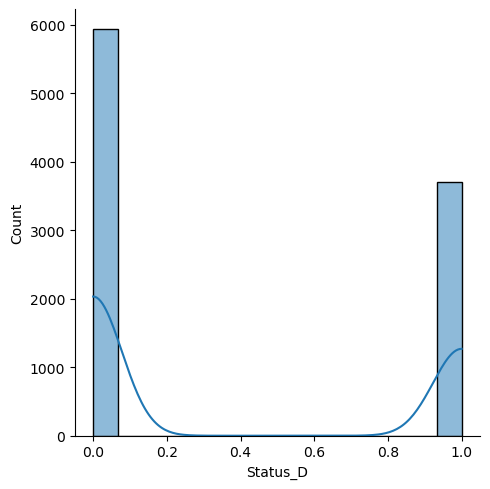

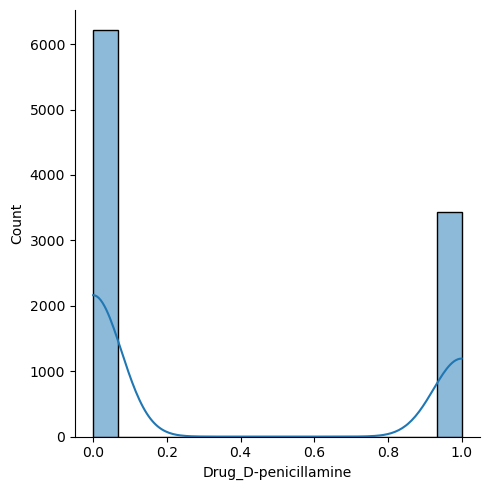

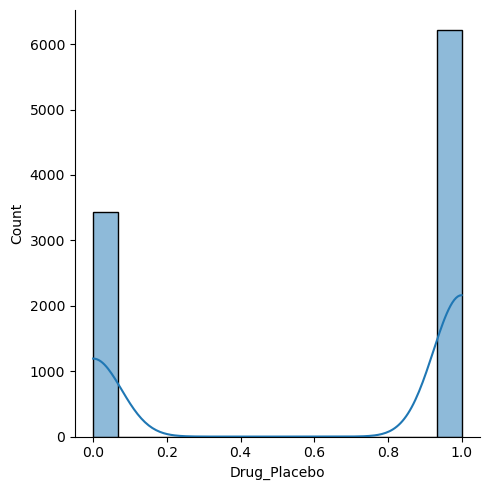

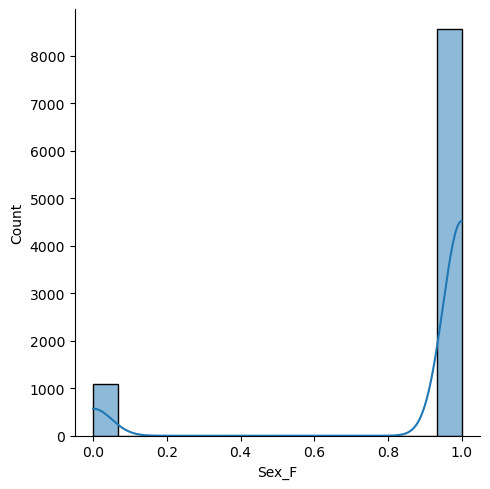

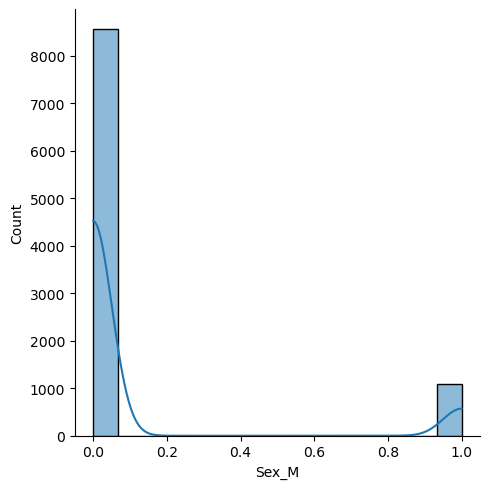

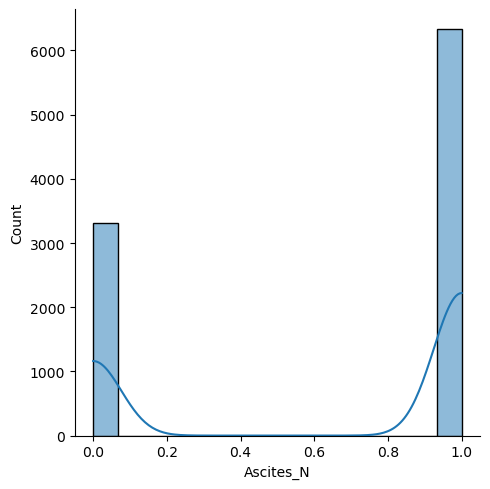

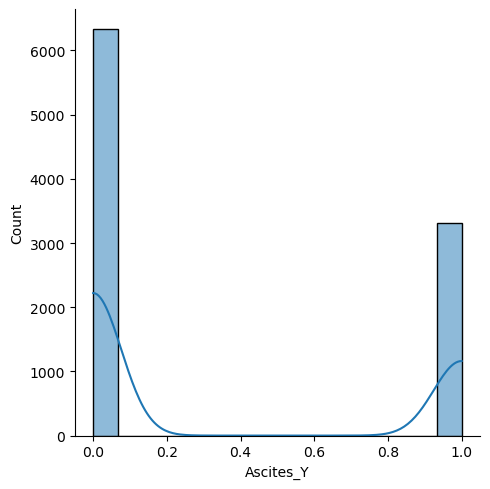

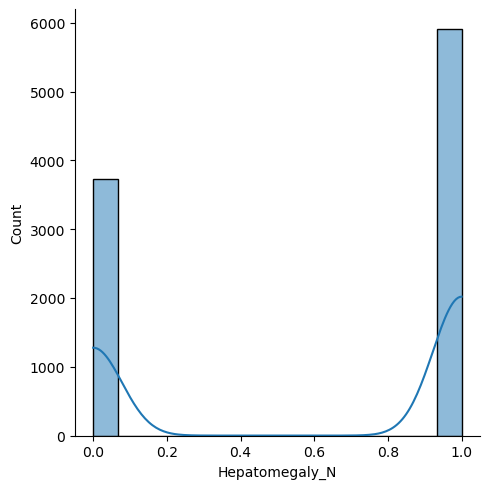

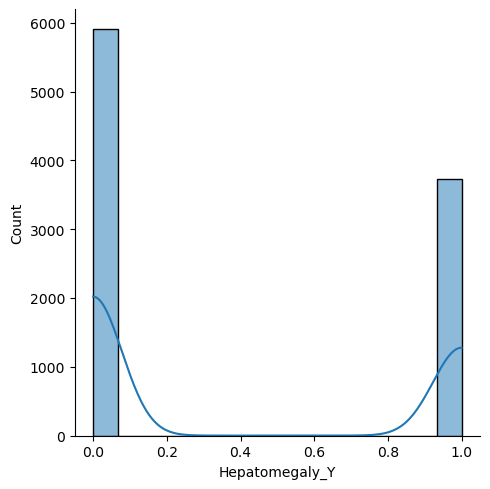

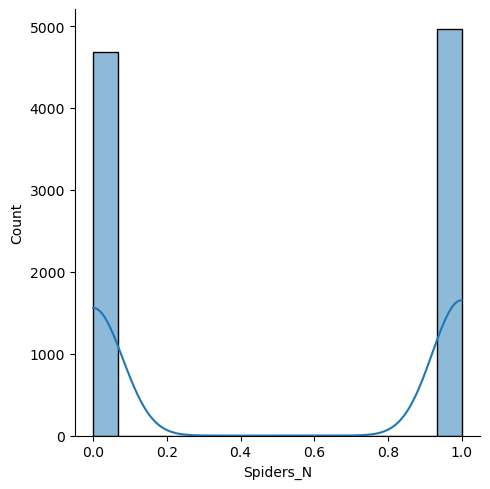

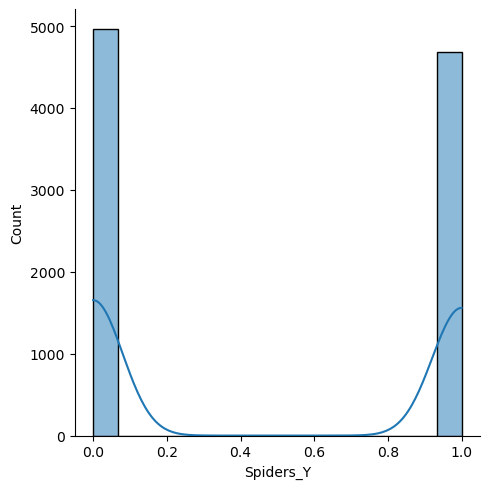

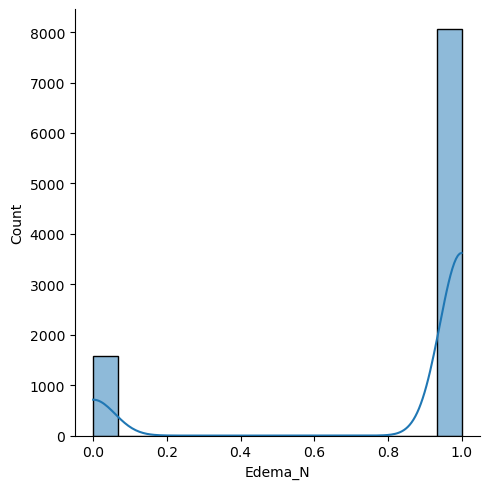

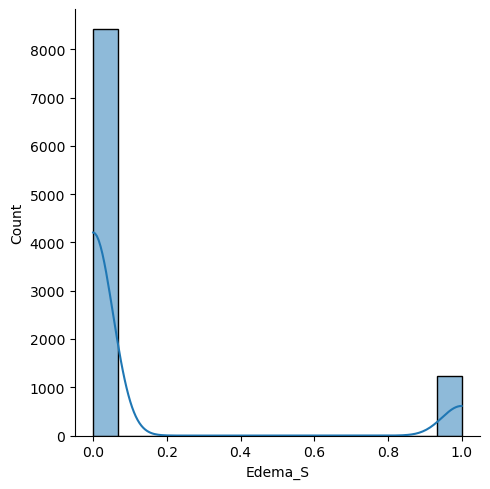

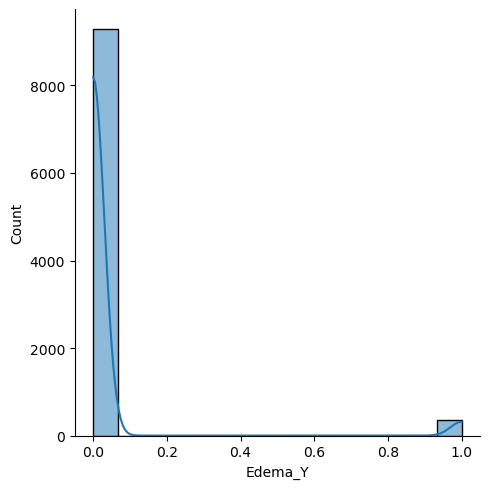

In [245]:
for col in final_data_B.columns:
    sns.displot(final_data_B[col],kde = True)
    

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Program

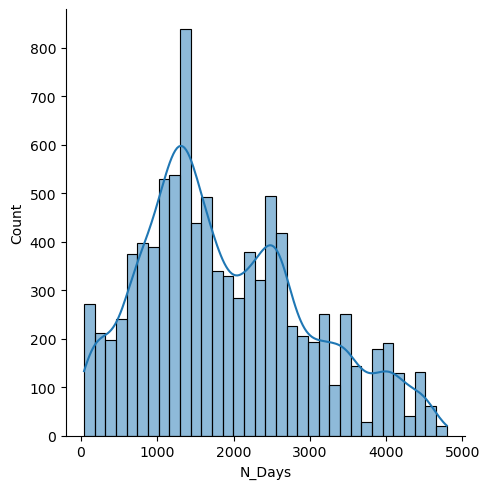

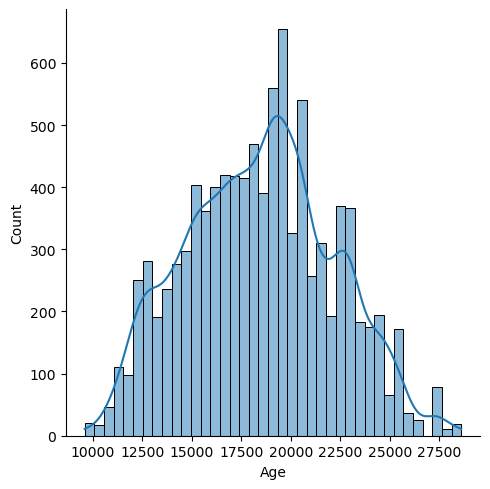

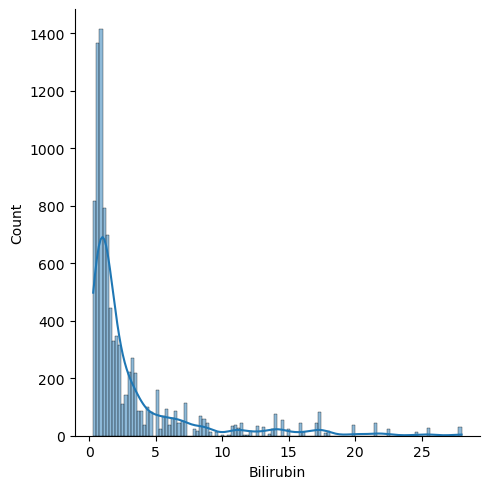

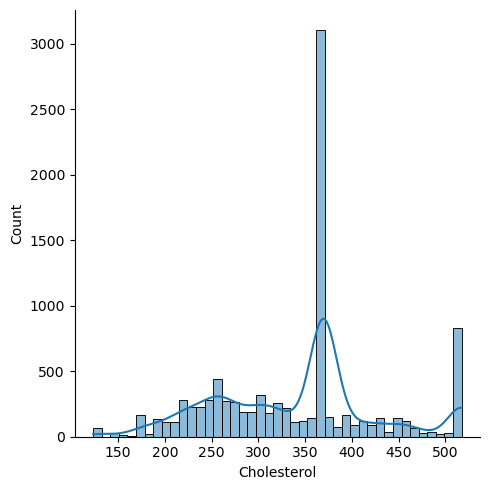

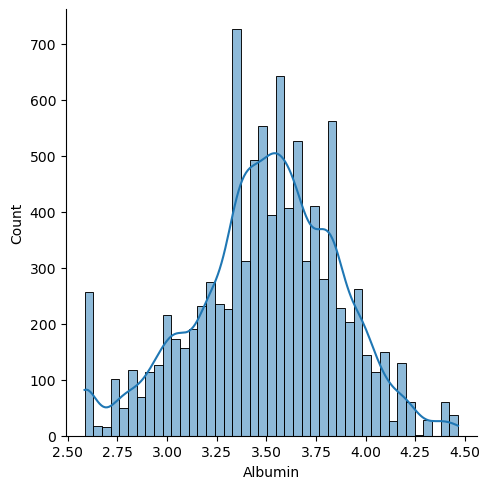

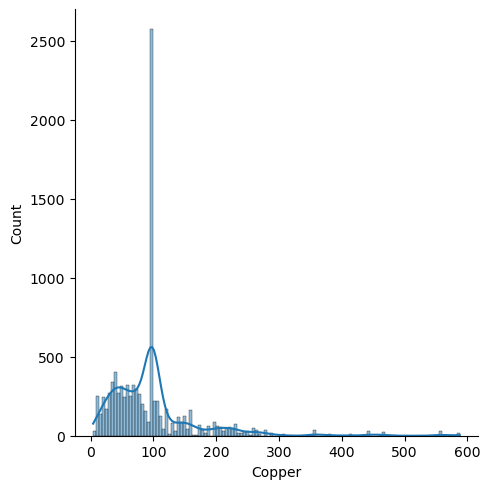

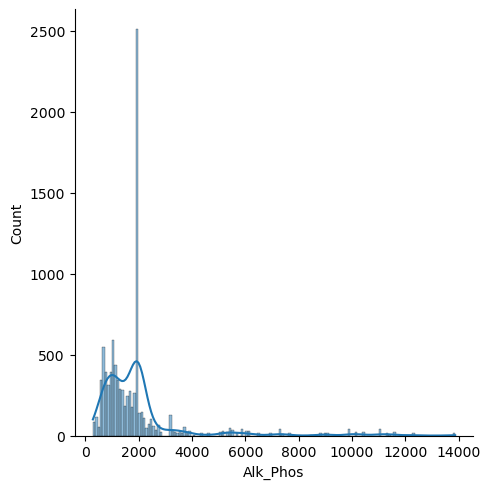

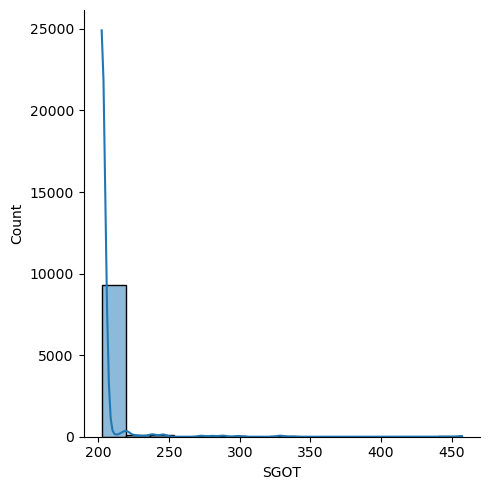

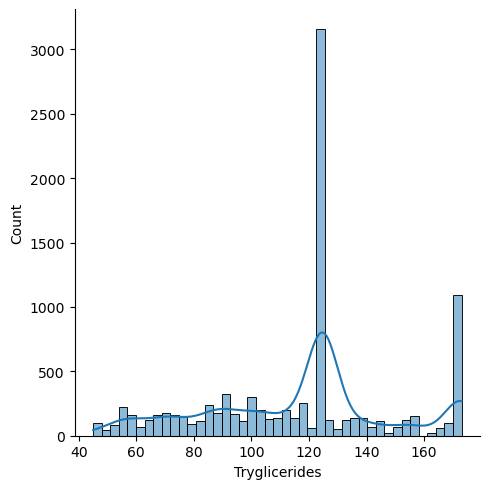

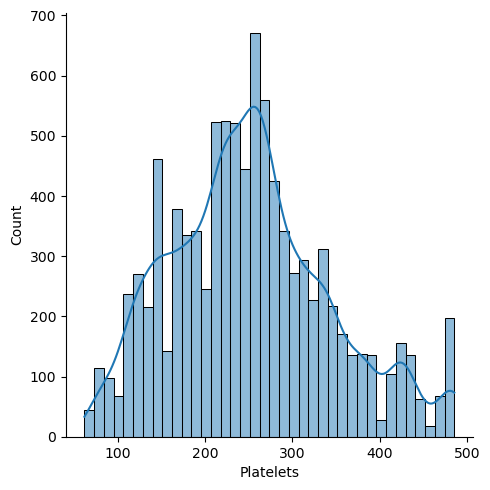

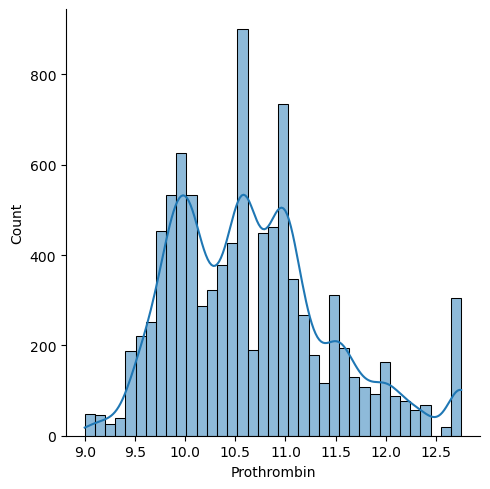

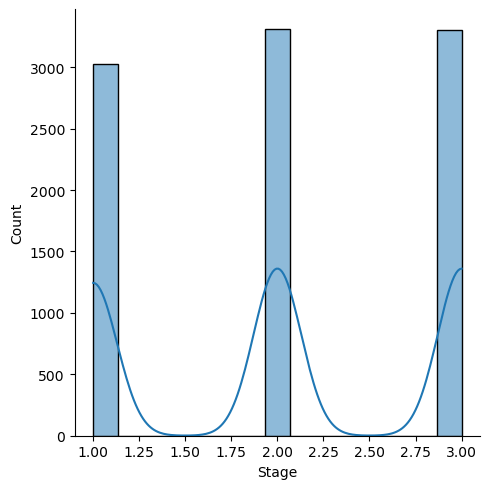

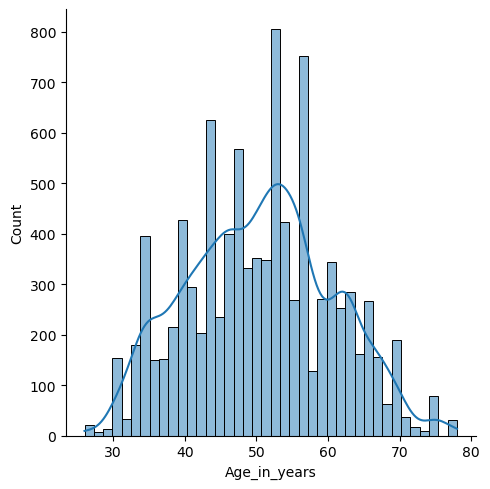

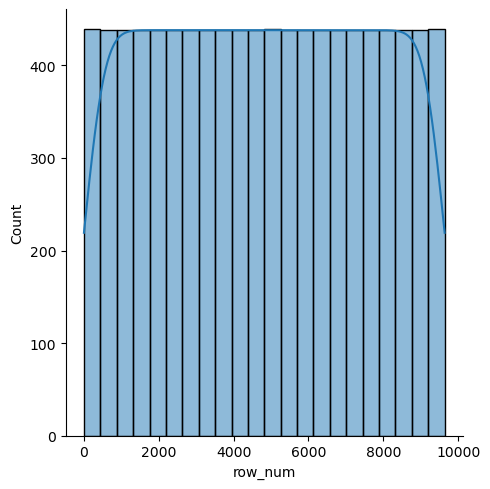

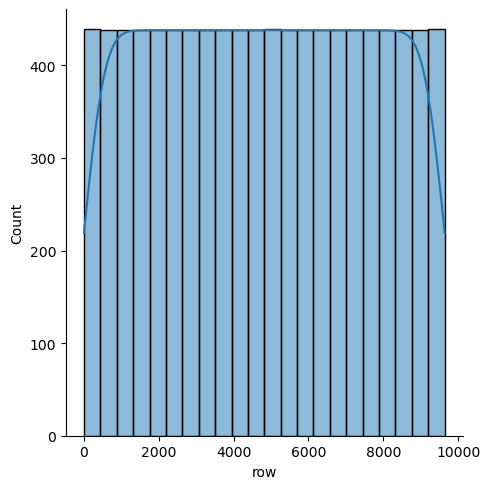

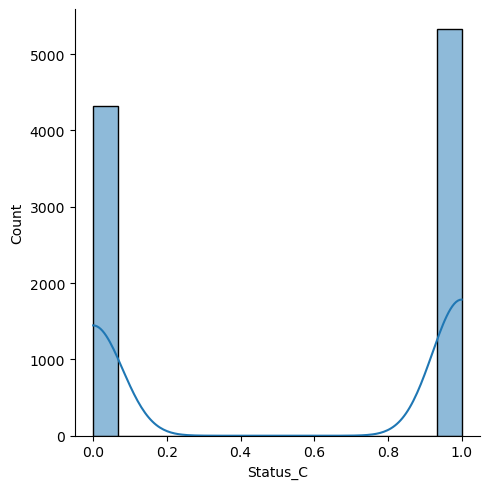

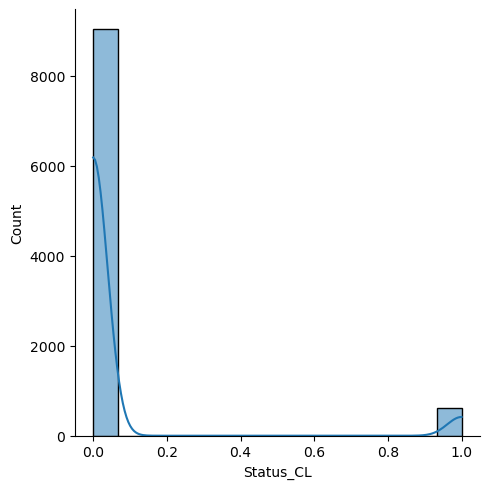

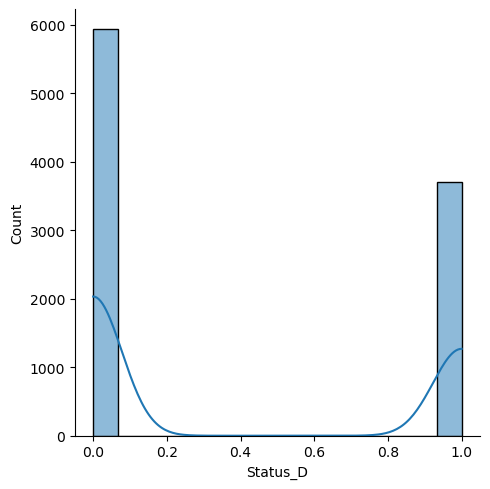

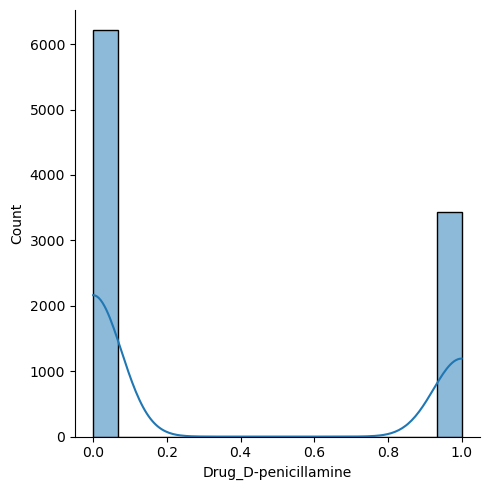

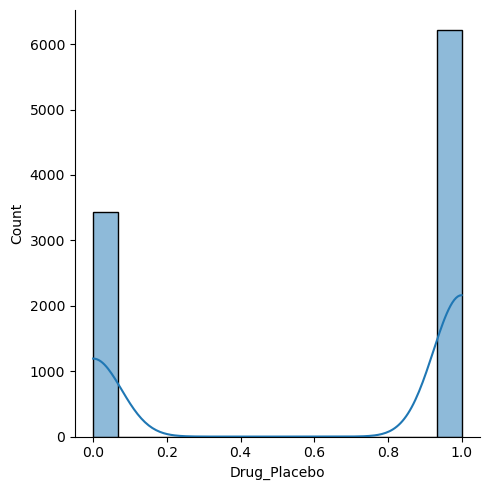

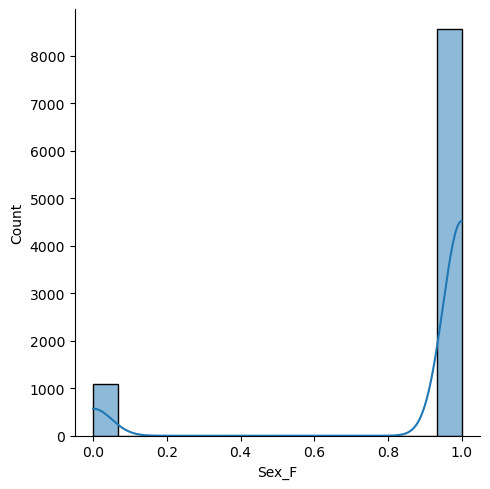

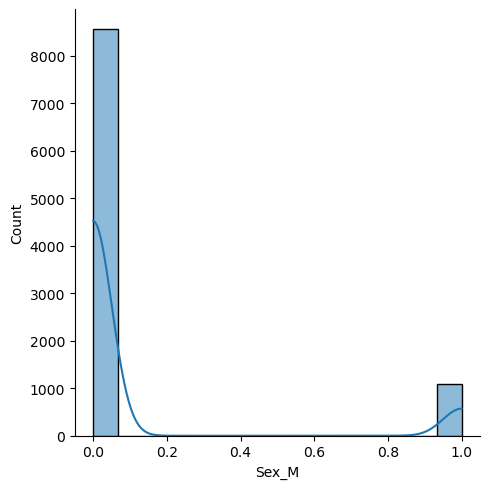

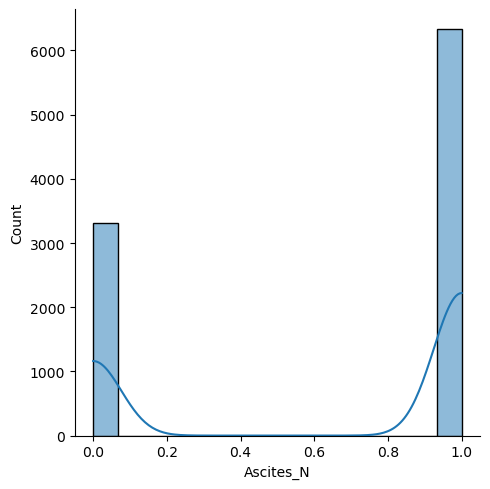

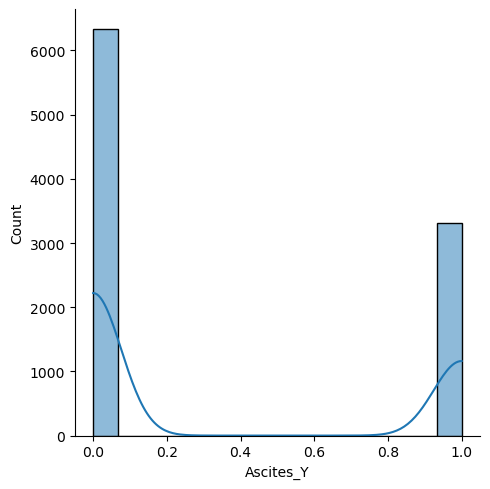

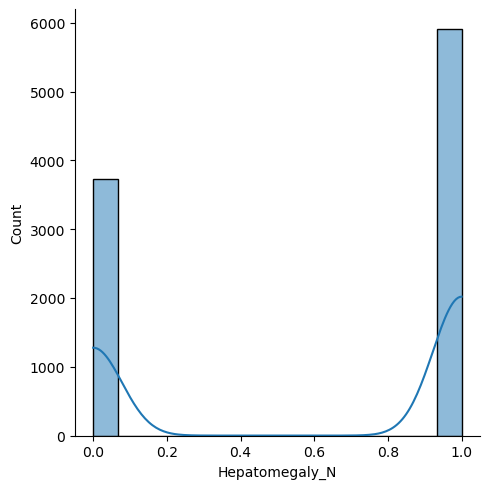

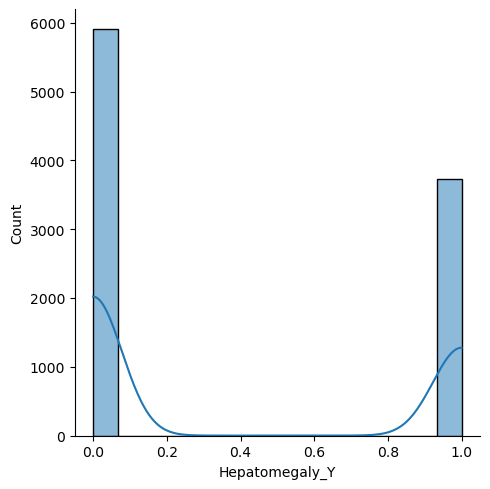

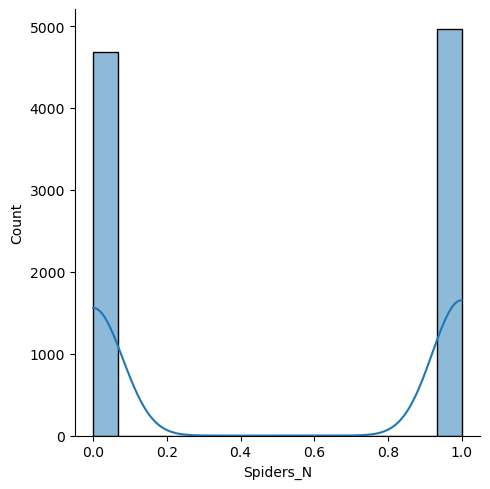

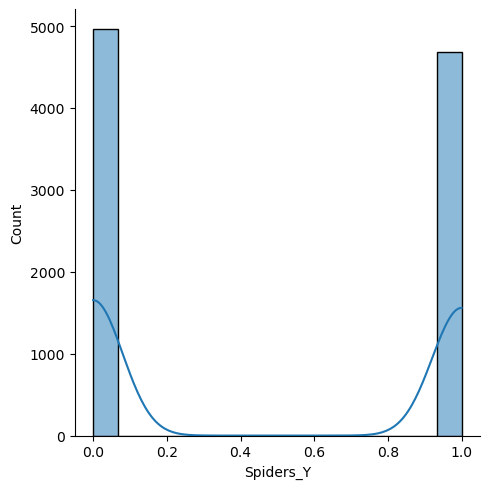

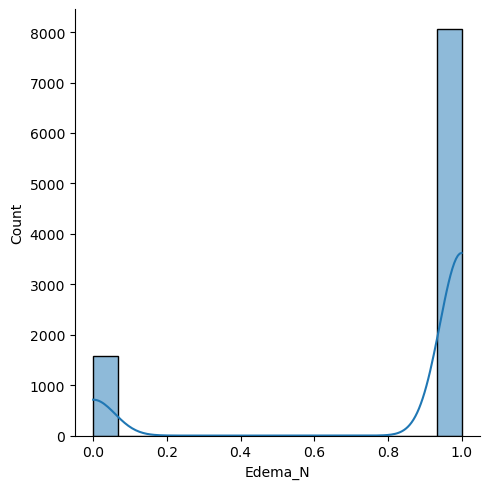

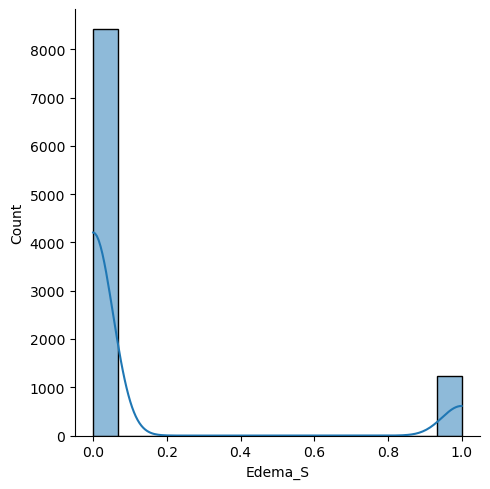

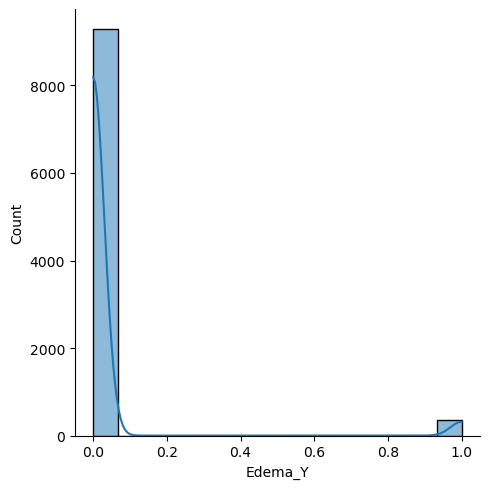

In [246]:
for col in final_data_A.columns:
    sns.displot(final_data_A[col],kde = True)
    

# Applying Logarithmic Transformation

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Program

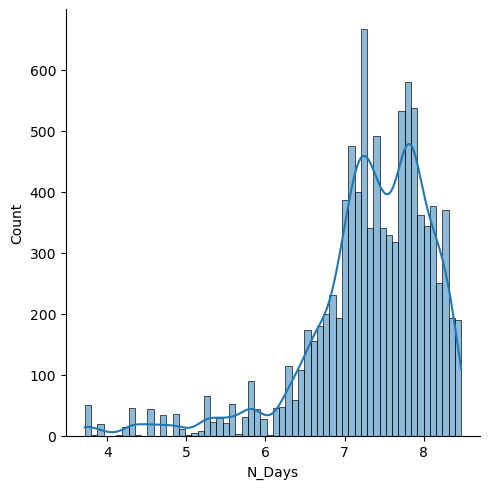

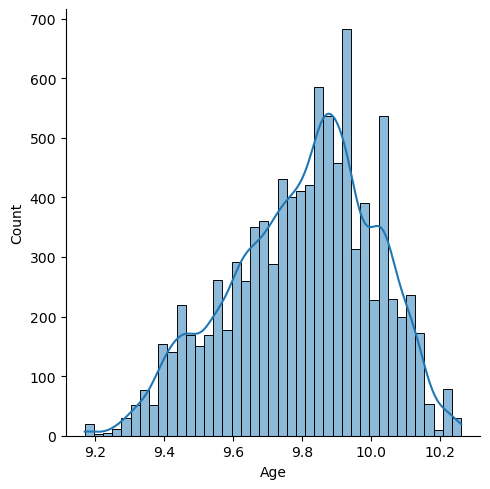

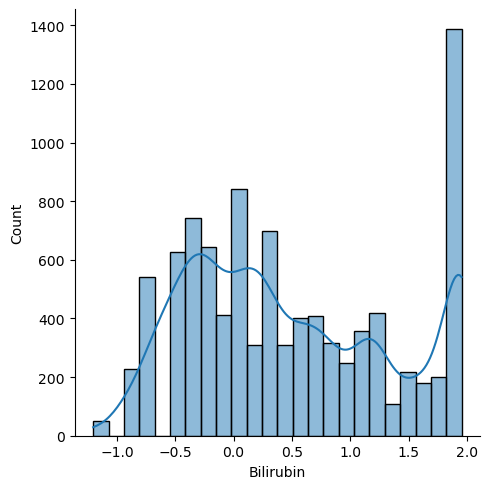

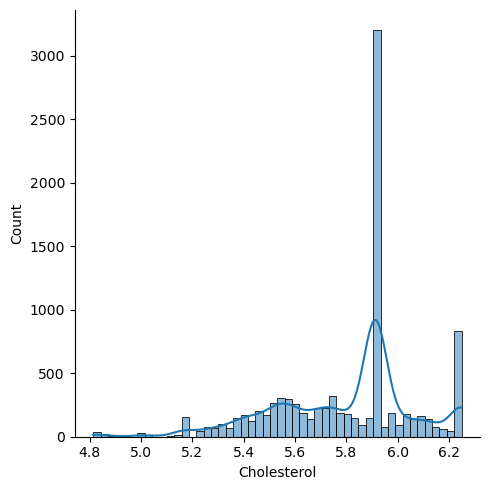

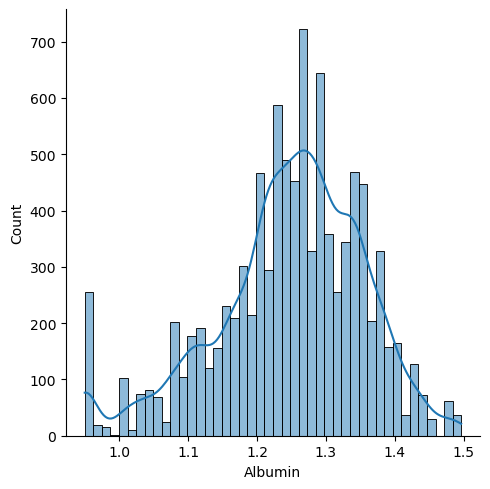

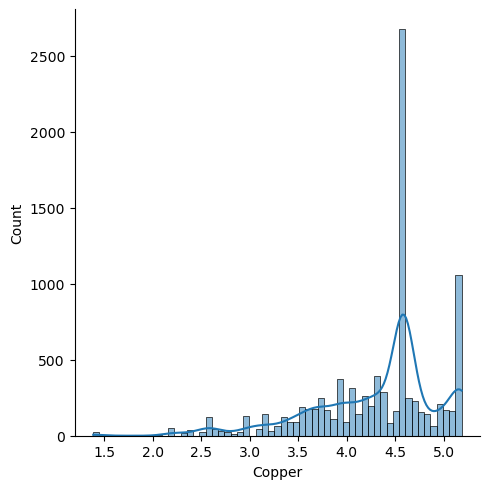

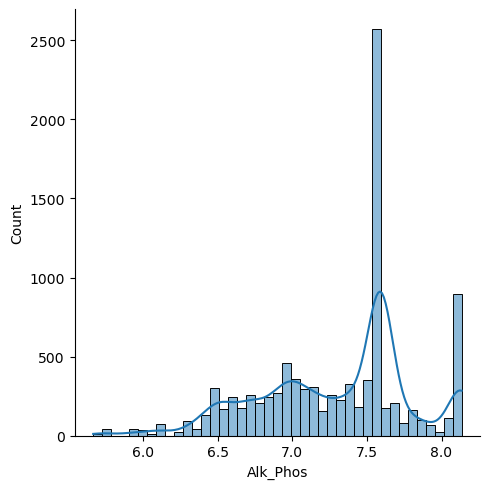

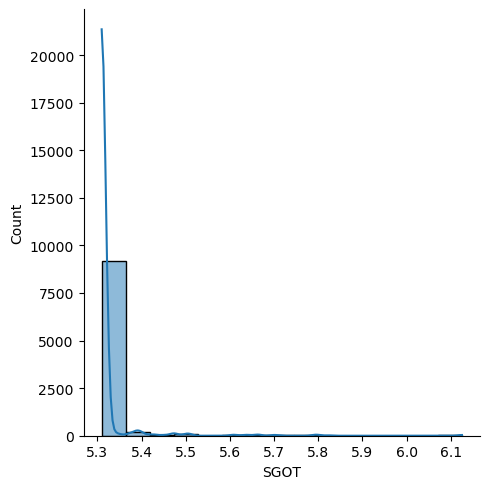

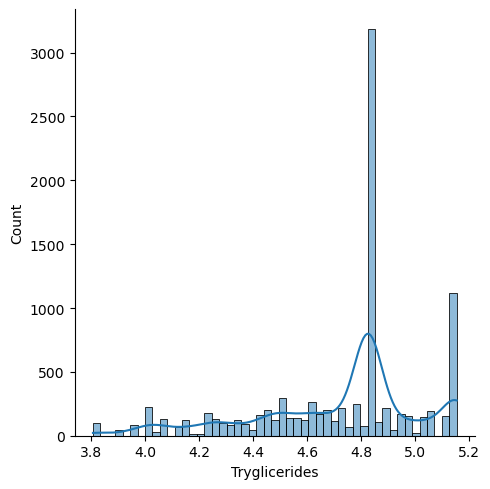

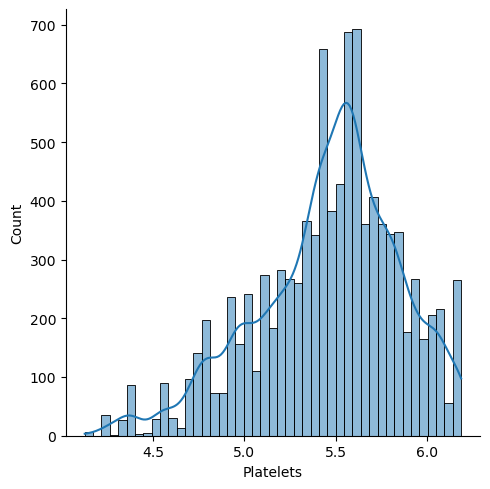

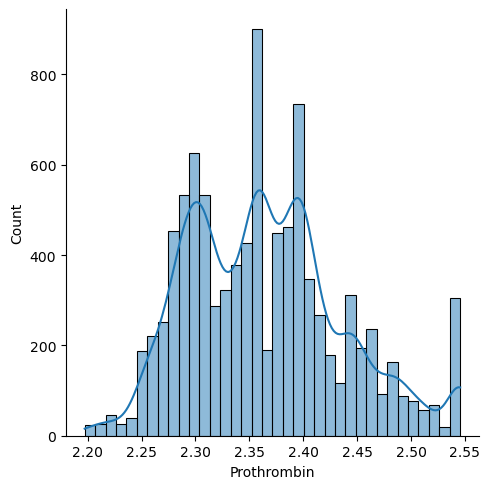

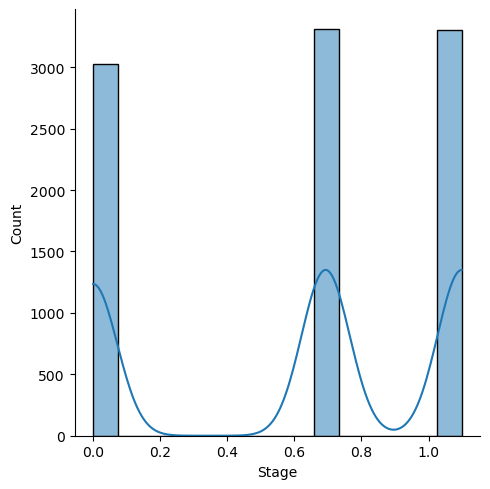

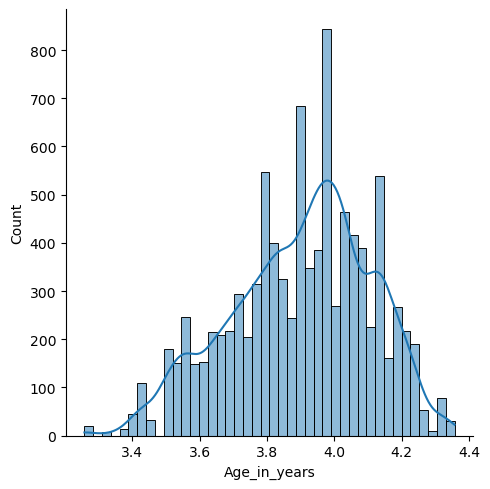

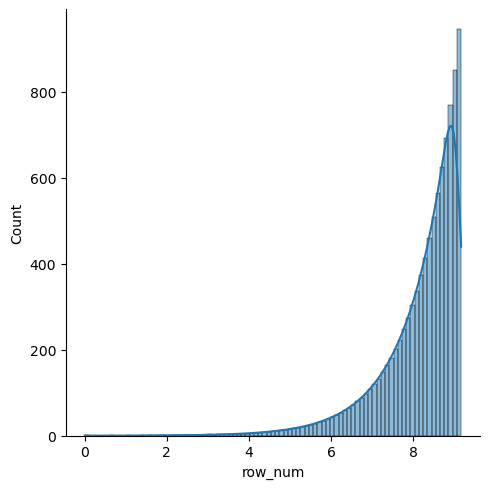

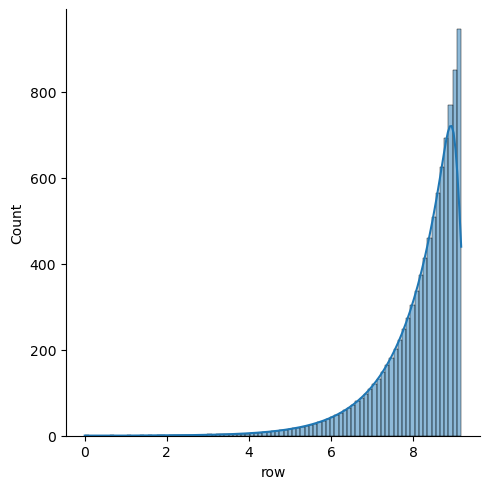

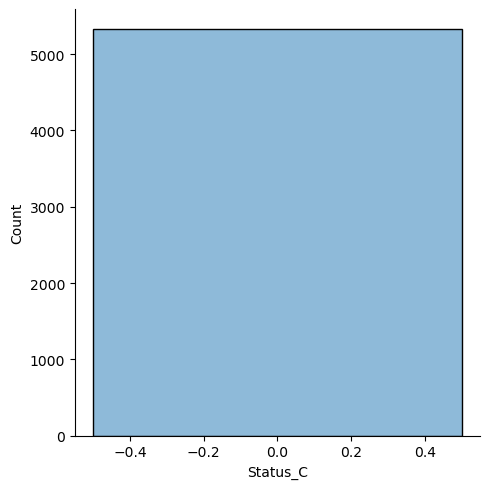

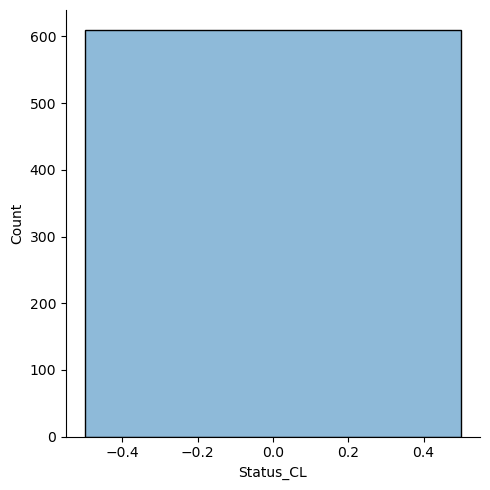

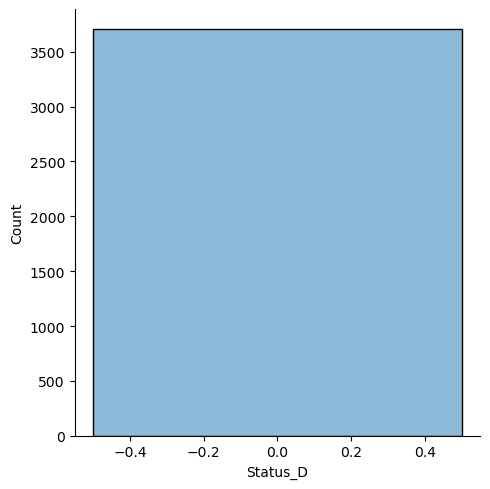

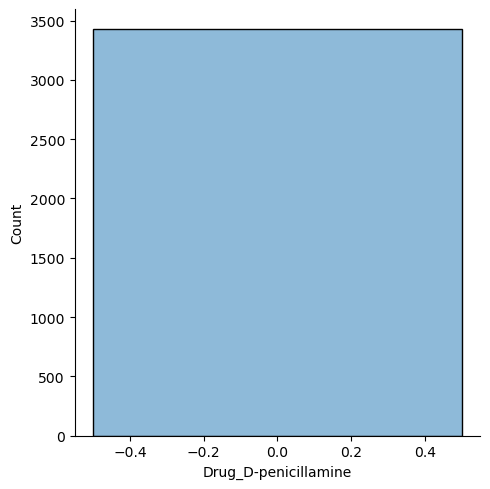

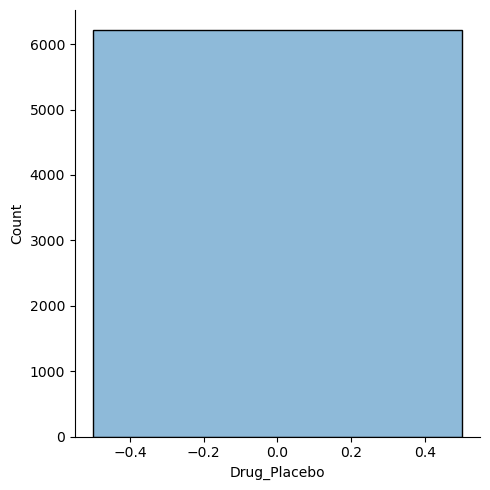

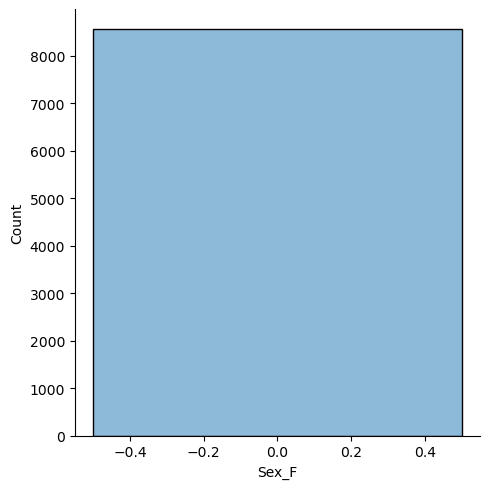

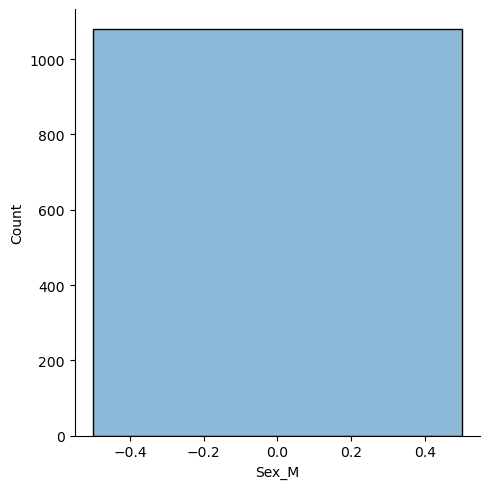

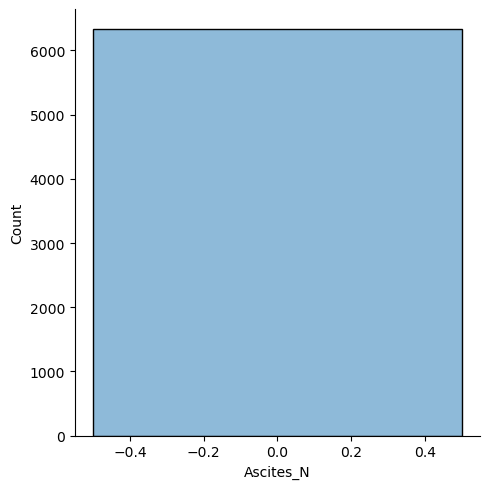

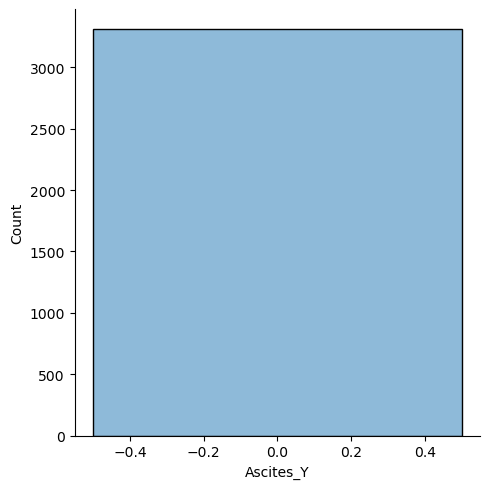

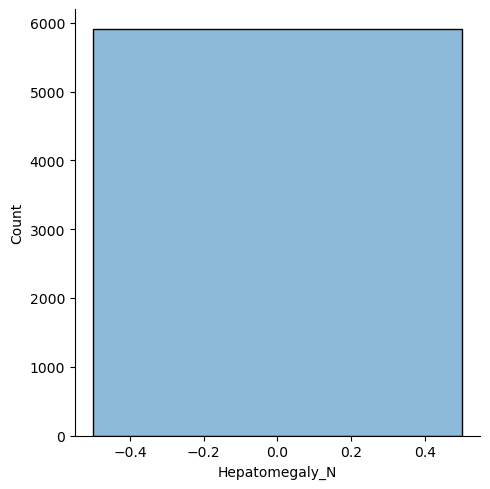

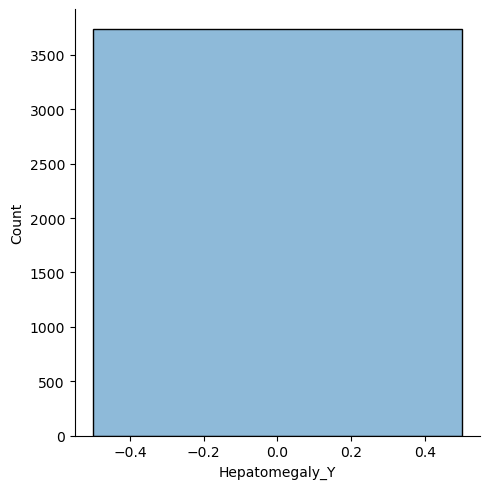

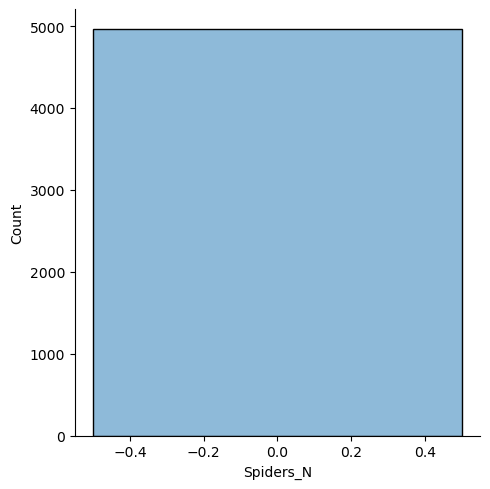

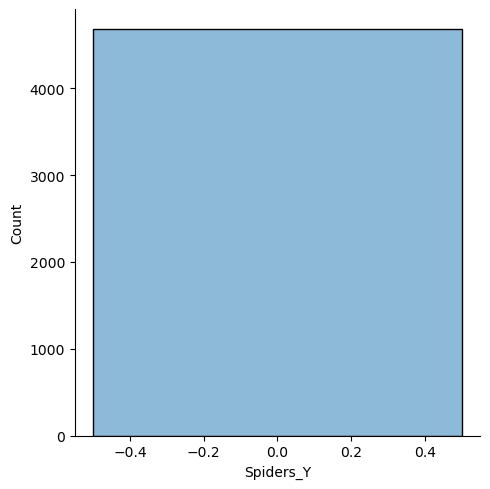

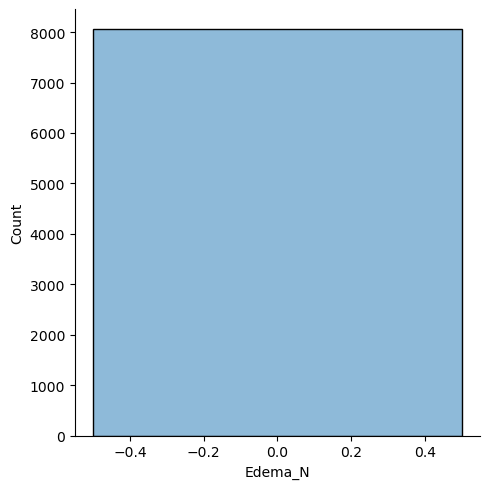

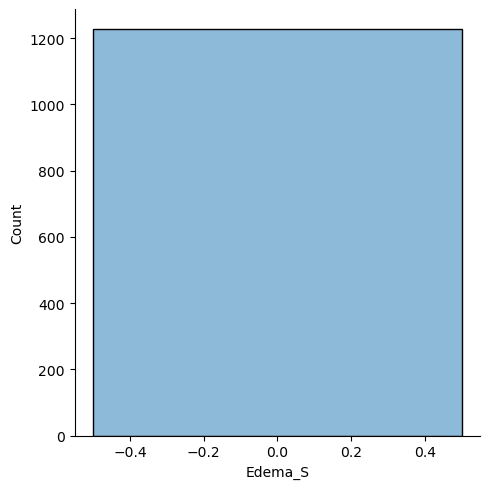

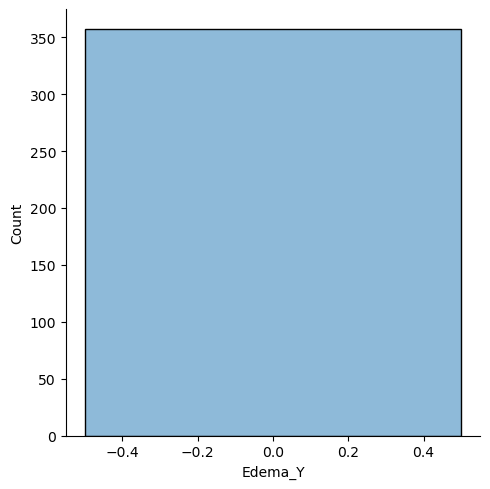

In [247]:
for col in final_data_B.columns:
    sns.displot(np.log(final_data_B[col]),kde = True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


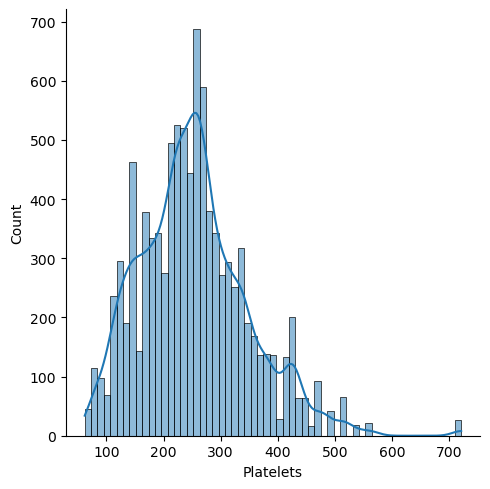

In [248]:
sns.displot(data.Platelets,kde = True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


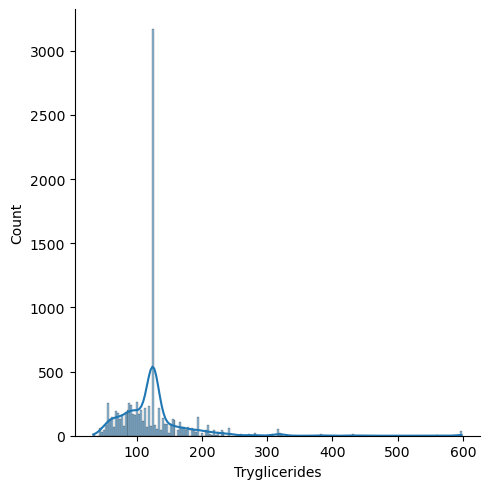

In [249]:
sns.displot(data.Tryglicerides,kde = True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


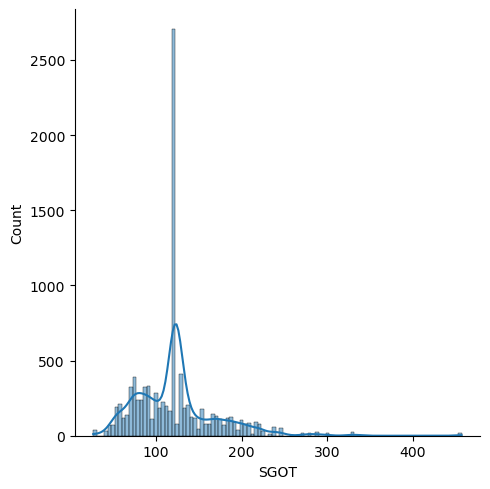

In [250]:
sns.displot(data.SGOT,kde = True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


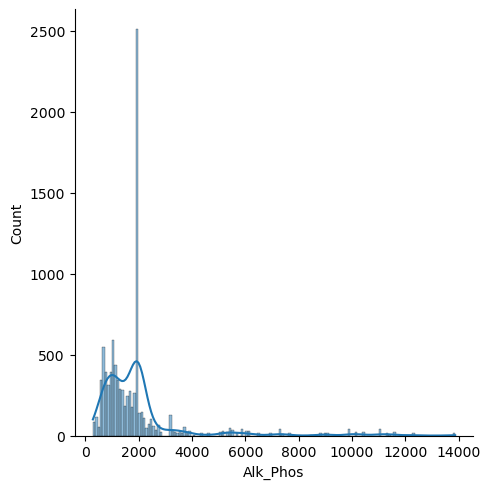

In [251]:
sns.displot(data.Alk_Phos,kde = True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


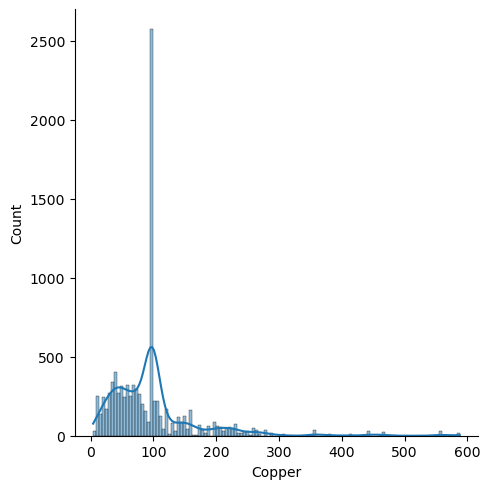

In [252]:
sns.displot(data.Copper,kde = True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


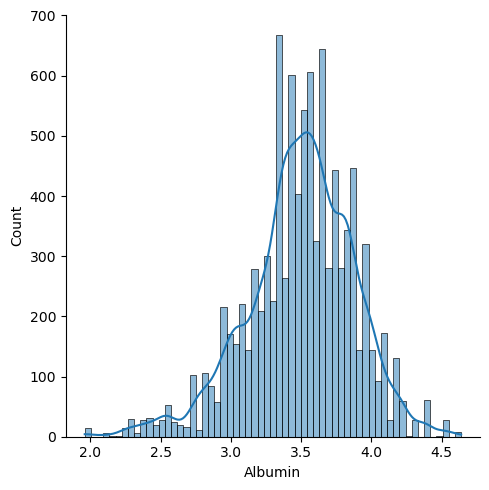

In [253]:
sns.displot(data.Albumin,kde = True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


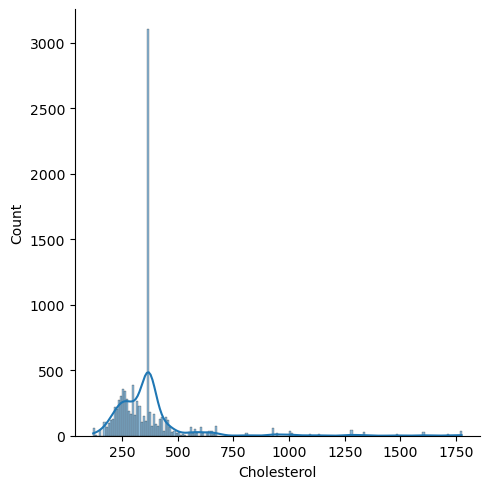

In [254]:
sns.displot(data.Cholesterol,kde = True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


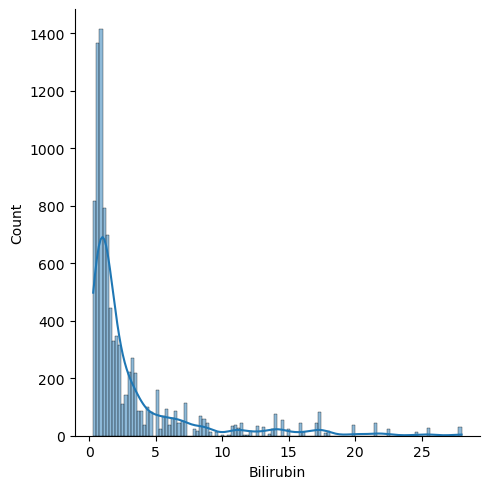

In [255]:
sns.displot(data.Bilirubin,kde = True)

### Copies of dataset 

In [256]:
final_data_B_all_log = final_data_B.copy()
final_data_B_no_log = final_data_B.copy()

In [257]:
final_data_A_all_log = final_data_A.copy()
final_data_A_no_log = final_data_A.copy()

### Log values of the variables

In [258]:
final_data_B_all_log.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,2221,18499.0,0.5,149.0,4.04,178.5,598.0,202.275,57.0,256.0,...,0,1,0,0,1,1,0,1,0,0
1,1230,19724.0,0.5,219.0,3.93,22.0,663.0,202.275,75.0,220.0,...,1,0,1,1,0,0,1,1,0,0
2,4184,11839.0,0.5,320.0,3.54,51.0,1243.0,202.275,80.0,225.0,...,0,1,0,1,0,1,0,1,0,0
3,2090,16467.0,0.7,255.0,3.74,23.0,1024.0,202.275,58.0,151.0,...,0,1,0,1,0,1,0,1,0,0
4,2105,21699.0,1.9,486.0,3.54,74.0,1052.0,202.275,109.0,151.0,...,0,1,0,0,1,1,0,1,0,0


In [259]:
final_data_B_all_log.shape

(9639, 31)

In [260]:
final_data_B_all_log['log_Bili '] = np.log(final_data_B_all_log['Bilirubin'])
final_data_B_all_log['log_Chol'] = np.log(final_data_B_all_log['Cholesterol'])
final_data_B_all_log['log_Alb'] = np.log(final_data_B_all_log['Albumin'])
final_data_B_all_log['log_Cop'] = np.log(final_data_B_all_log['Copper'])
final_data_B_all_log['log_Alk'] = np.log(final_data_B_all_log['Alk_Phos'])
final_data_B_all_log['log_SGOT'] = np.log(final_data_B_all_log['SGOT'])
final_data_B_all_log['log_Tryg'] = np.log(final_data_B_all_log['Tryglicerides'])
final_data_B_all_log['log_Pla'] = np.log(final_data_B_all_log['Platelets'])
final_data_B_all_log['log_Pro'] = np.log(final_data_B_all_log['Prothrombin'])

In [261]:
final_data_B_all_log.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Edema_Y,log_Bili,log_Chol,log_Alb,log_Cop,log_Alk,log_SGOT,log_Tryg,log_Pla,log_Pro
0,2221,18499.0,0.5,149.0,4.04,178.5,598.0,202.275,57.0,256.0,...,0,-0.693147,5.003946,1.396245,5.184589,6.393591,5.309628,4.043051,5.545177,2.292535
1,1230,19724.0,0.5,219.0,3.93,22.0,663.0,202.275,75.0,220.0,...,0,-0.693147,5.389072,1.368639,3.091042,6.496775,5.309628,4.317488,5.393628,2.379546
2,4184,11839.0,0.5,320.0,3.54,51.0,1243.0,202.275,80.0,225.0,...,0,-0.693147,5.768321,1.264127,3.931826,7.125283,5.309628,4.382027,5.416100,2.302585
3,2090,16467.0,0.7,255.0,3.74,23.0,1024.0,202.275,58.0,151.0,...,0,-0.356675,5.541264,1.319086,3.135494,6.931472,5.309628,4.060443,5.017280,2.322388
4,2105,21699.0,1.9,486.0,3.54,74.0,1052.0,202.275,109.0,151.0,...,0,0.641854,6.186209,1.264127,4.304065,6.958448,5.309628,4.691348,5.017280,2.442347


In [262]:
final_data_B_all_log = final_data_B_all_log.drop(columns='Bilirubin')
final_data_B_all_log = final_data_B_all_log.drop(columns='Cholesterol')
final_data_B_all_log = final_data_B_all_log.drop(columns='Albumin')
final_data_B_all_log = final_data_B_all_log.drop(columns='Copper')
final_data_B_all_log = final_data_B_all_log.drop(columns='Alk_Phos')
final_data_B_all_log = final_data_B_all_log.drop(columns='SGOT')
final_data_B_all_log = final_data_B_all_log.drop(columns='Tryglicerides')
final_data_B_all_log = final_data_B_all_log.drop(columns='Platelets')
final_data_B_all_log = final_data_B_all_log.drop(columns='Prothrombin')

In [263]:
final_data_B_all_log.head()

,N_Days,Age,Stage,Age_in_years,row_num,row,Status_C,Status_CL,Status_D,Drug_D-penicillamine,...,Edema_Y,log_Bili,log_Chol,log_Alb,log_Cop,log_Alk,log_SGOT,log_Tryg,log_Pla,log_Pro
0,2221,18499.0,1,51.0,1,1,1,0,0,0,...,0,-0.693147,5.003946,1.396245,5.184589,6.393591,5.309628,4.043051,5.545177,2.292535
1,1230,19724.0,2,54.0,2,2,1,0,0,0,...,0,-0.693147,5.389072,1.368639,3.091042,6.496775,5.309628,4.317488,5.393628,2.379546
2,4184,11839.0,2,32.0,3,3,1,0,0,0,...,0,-0.693147,5.768321,1.264127,3.931826,7.125283,5.309628,4.382027,5.416100,2.302585
3,2090,16467.0,2,45.0,4,4,0,0,1,0,...,0,-0.356675,5.541264,1.319086,3.135494,6.931472,5.309628,4.060443,5.017280,2.322388
4,2105,21699.0,1,59.0,5,5,0,0,1,0,...,0,0.641854,6.186209,1.264127,4.304065,6.958448,5.309628,4.691348,5.017280,2.442347


In [160]:
final_data_A_all_log.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Age_in_years,row_num,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,row
0,2221,18499.0,0.5,149.0,4.04,227.0,598.0,202.275,57.0,256.0,...,51.0,1,C,Placebo,F,N,Y,N,N,1
1,1230,19724.0,0.5,219.0,3.93,22.0,663.0,202.275,75.0,220.0,...,54.0,2,C,Placebo,M,Y,N,Y,N,2
2,4184,11839.0,0.5,320.0,3.54,51.0,1243.0,202.275,80.0,225.0,...,32.0,3,C,Placebo,F,N,N,N,N,3
3,2090,16467.0,0.7,255.0,3.74,23.0,1024.0,202.275,58.0,151.0,...,45.0,4,D,Placebo,F,N,N,N,N,4
4,2105,21699.0,1.9,486.0,3.54,74.0,1052.0,202.275,109.0,151.0,...,59.0,5,D,Placebo,F,N,Y,N,N,5


In [161]:
final_data_A_all_log.shape

(9639, 22)

In [264]:
final_data_A_all_log['log_Bili '] = np.log(final_data_A_all_log['Bilirubin'])
final_data_A_all_log['log_Chol'] = np.log(final_data_A_all_log['Cholesterol'])
final_data_A_all_log['log_Alb'] = np.log(final_data_A_all_log['Albumin'])
final_data_A_all_log['log_Cop'] = np.log(final_data_A_all_log['Copper'])
final_data_A_all_log['log_Alk'] = np.log(final_data_A_all_log['Alk_Phos'])
final_data_A_all_log['log_SGOT'] = np.log(final_data_A_all_log['SGOT'])
final_data_A_all_log['log_Tryg'] = np.log(final_data_A_all_log['Tryglicerides'])
final_data_A_all_log['log_Pla'] = np.log(final_data_A_all_log['Platelets'])
final_data_A_all_log['log_Pro'] = np.log(final_data_A_all_log['Prothrombin'])

In [265]:
final_data_A_all_log.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Edema_Y,log_Bili,log_Chol,log_Alb,log_Cop,log_Alk,log_SGOT,log_Tryg,log_Pla,log_Pro
0,2221,18499.0,0.5,149.0,4.04,227.0,598.0,202.275,57.0,256.0,...,0,-0.693147,5.003946,1.396245,5.424950,6.393591,5.309628,4.043051,5.545177,2.292535
1,1230,19724.0,0.5,219.0,3.93,22.0,663.0,202.275,75.0,220.0,...,0,-0.693147,5.389072,1.368639,3.091042,6.496775,5.309628,4.317488,5.393628,2.379546
2,4184,11839.0,0.5,320.0,3.54,51.0,1243.0,202.275,80.0,225.0,...,0,-0.693147,5.768321,1.264127,3.931826,7.125283,5.309628,4.382027,5.416100,2.302585
3,2090,16467.0,0.7,255.0,3.74,23.0,1024.0,202.275,58.0,151.0,...,0,-0.356675,5.541264,1.319086,3.135494,6.931472,5.309628,4.060443,5.017280,2.322388
4,2105,21699.0,1.9,486.0,3.54,74.0,1052.0,202.275,109.0,151.0,...,0,0.641854,6.186209,1.264127,4.304065,6.958448,5.309628,4.691348,5.017280,2.442347


In [266]:
final_data_A_all_log = final_data_A_all_log.drop(columns='Bilirubin')
final_data_A_all_log = final_data_A_all_log.drop(columns='Cholesterol')
final_data_A_all_log = final_data_A_all_log.drop(columns='Albumin')
final_data_A_all_log = final_data_A_all_log.drop(columns='Copper')
final_data_A_all_log = final_data_A_all_log.drop(columns='Alk_Phos')
final_data_A_all_log = final_data_A_all_log.drop(columns='SGOT')
final_data_A_all_log = final_data_A_all_log.drop(columns='Tryglicerides')
final_data_A_all_log = final_data_A_all_log.drop(columns='Platelets')
final_data_A_all_log = final_data_A_all_log.drop(columns='Prothrombin')

In [267]:
final_data_A_all_log.head()

,N_Days,Age,Stage,Age_in_years,row_num,row,Status_C,Status_CL,Status_D,Drug_D-penicillamine,...,Edema_Y,log_Bili,log_Chol,log_Alb,log_Cop,log_Alk,log_SGOT,log_Tryg,log_Pla,log_Pro
0,2221,18499.0,1,51.0,1,1,1,0,0,0,...,0,-0.693147,5.003946,1.396245,5.424950,6.393591,5.309628,4.043051,5.545177,2.292535
1,1230,19724.0,2,54.0,2,2,1,0,0,0,...,0,-0.693147,5.389072,1.368639,3.091042,6.496775,5.309628,4.317488,5.393628,2.379546
2,4184,11839.0,2,32.0,3,3,1,0,0,0,...,0,-0.693147,5.768321,1.264127,3.931826,7.125283,5.309628,4.382027,5.416100,2.302585
3,2090,16467.0,2,45.0,4,4,0,0,1,0,...,0,-0.356675,5.541264,1.319086,3.135494,6.931472,5.309628,4.060443,5.017280,2.322388
4,2105,21699.0,1,59.0,5,5,0,0,1,0,...,0,0.641854,6.186209,1.264127,4.304065,6.958448,5.309628,4.691348,5.017280,2.442347


## Feature Engineering

### Correlation Analysis

In [268]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [269]:
corr = final_data_B_all_log.corrwith(final_data_B_all_log.Stage).abs().sort_values(ascending = False)

In [270]:
corr

Stage                   1.000000
Hepatomegaly_N          0.337109
Hepatomegaly_Y          0.337109
log_Pro                 0.319489
N_Days                  0.272084
log_Bili                0.259466
Edema_N                 0.255382
Status_C                0.248654
Status_D                0.243310
log_Alb                 0.233564
log_Pla                 0.219572
Edema_S                 0.184945
Edema_Y                 0.174719
log_Cop                 0.156482
Spiders_Y               0.155725
Spiders_N               0.155725
Age_in_years            0.101326
Age                     0.100802
Ascites_Y               0.079176
Ascites_N               0.079176
log_Alk                 0.074969
log_Tryg                0.062706
Sex_M                   0.049380
Sex_F                   0.049380
Drug_D-penicillamine    0.028073
Drug_Placebo            0.028073
Status_CL               0.021717
log_SGOT                0.012297
row                     0.011164
row_num                 0.011164
log_Chol  

In [274]:
p = corr[np.abs(corr)>0.10].index.difference(['Stage'])
p

Index(['Age', 'Age_in_years', 'Edema_N', 'Edema_S', 'Edema_Y',
       'Hepatomegaly_N', 'Hepatomegaly_Y', 'N_Days', 'Spiders_N', 'Spiders_Y',
       'Status_C', 'Status_D', 'log_Alb', 'log_Bili ', 'log_Cop', 'log_Pla',
       'log_Pro'],
      dtype='object')

In [275]:
final_data_B_all_log = final_data_B_all_log.loc[ : : ,['Age', 'Age_in_years', 'Edema_N', 'Edema_S', 'Edema_Y','Hepatomegaly_N', 'Hepatomegaly_Y', 'N_Days', 'Spiders_N', 'Spiders_Y','Status_C', 'Status_D', 'log_Alb', 'log_Bili ', 'log_Cop', 'log_Pla','log_Pro']]

In [276]:
final_data_B_all_log.head()

,Age,Age_in_years,Edema_N,Edema_S,Edema_Y,Hepatomegaly_N,Hepatomegaly_Y,N_Days,Spiders_N,Spiders_Y,Status_C,Status_D,log_Alb,log_Bili,log_Cop,log_Pla,log_Pro
0,18499.0,51.0,1,0,0,0,1,2221,1,0,1,0,1.396245,-0.693147,5.184589,5.545177,2.292535
1,19724.0,54.0,1,0,0,1,0,1230,0,1,1,0,1.368639,-0.693147,3.091042,5.393628,2.379546
2,11839.0,32.0,1,0,0,1,0,4184,1,0,1,0,1.264127,-0.693147,3.931826,5.416100,2.302585
3,16467.0,45.0,1,0,0,1,0,2090,1,0,0,1,1.319086,-0.356675,3.135494,5.017280,2.322388
4,21699.0,59.0,1,0,0,0,1,2105,1,0,0,1,1.264127,0.641854,4.304065,5.017280,2.442347


In [277]:
final_data_B_all_log.shape

(9639, 17)

In [279]:
corr_2 = final_data_A_all_log.corrwith(final_data_A_all_log.Stage).abs().sort_values(ascending = False)

In [280]:
corr_2

Stage                   1.000000
Hepatomegaly_N          0.337109
Hepatomegaly_Y          0.337109
log_Pro                 0.319489
N_Days                  0.272084
Edema_N                 0.255382
log_Bili                0.249808
Status_C                0.248654
Status_D                0.243310
log_Alb                 0.233564
log_Pla                 0.219572
Edema_S                 0.184945
Edema_Y                 0.174719
log_Cop                 0.167104
Spiders_Y               0.155725
Spiders_N               0.155725
Age_in_years            0.101326
Age                     0.100802
Ascites_Y               0.079176
Ascites_N               0.079176
log_Alk                 0.072091
log_Tryg                0.062706
Sex_M                   0.049380
Sex_F                   0.049380
Drug_D-penicillamine    0.028073
Drug_Placebo            0.028073
Status_CL               0.021717
log_SGOT                0.012297
row                     0.011164
row_num                 0.011164
log_Chol  

In [283]:
q = corr_2[np.abs(corr_2)>0.1].index.difference(['Stage'])
q

Index(['Age', 'Age_in_years', 'Edema_N', 'Edema_S', 'Edema_Y',
       'Hepatomegaly_N', 'Hepatomegaly_Y', 'N_Days', 'Spiders_N', 'Spiders_Y',
       'Status_C', 'Status_D', 'log_Alb', 'log_Bili ', 'log_Cop', 'log_Pla',
       'log_Pro'],
      dtype='object')

In [284]:
final_data_A_all_log = final_data_A_all_log.loc[ : : ,['Age', 'Age_in_years', 'Edema_N', 'Edema_S', 'Edema_Y','Hepatomegaly_N', 'Hepatomegaly_Y', 'N_Days', 'Spiders_N', 'Spiders_Y','Status_C', 'Status_D', 'log_Alb', 'log_Bili ', 'log_Cop', 'log_Pla','log_Pro']]

In [285]:
final_data_A_all_log.head()

,Age,Age_in_years,Edema_N,Edema_S,Edema_Y,Hepatomegaly_N,Hepatomegaly_Y,N_Days,Spiders_N,Spiders_Y,Status_C,Status_D,log_Alb,log_Bili,log_Cop,log_Pla,log_Pro
0,18499.0,51.0,1,0,0,0,1,2221,1,0,1,0,1.396245,-0.693147,5.424950,5.545177,2.292535
1,19724.0,54.0,1,0,0,1,0,1230,0,1,1,0,1.368639,-0.693147,3.091042,5.393628,2.379546
2,11839.0,32.0,1,0,0,1,0,4184,1,0,1,0,1.264127,-0.693147,3.931826,5.416100,2.302585
3,16467.0,45.0,1,0,0,1,0,2090,1,0,0,1,1.319086,-0.356675,3.135494,5.017280,2.322388
4,21699.0,59.0,1,0,0,0,1,2105,1,0,0,1,1.264127,0.641854,4.304065,5.017280,2.442347


In [286]:
final_data_A_all_log.shape

(9639, 17)